# 분석 
## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?
## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- 분석을 통해 가설을 검정

# 결론 
## 결론적으로 음주 여부에 따라 건강검진 수치가 차이가 있고, 신장과 허리둘레의 크기는 체중과 상관관계가 있습니다.

## 3. 라이브러리 로드 

In [1]:
import pandas as pd # 데이터 분석용 라이브러리
import numpy as np # 수치 계산 라이브러리
import seaborn as sns # 시각화 아이브러리
import matplotlib.pyplot as plt # 그래프 폰트, 스타일 변경, 사이즈 조정 등을 위한 라이브러리
# %matplotlib inline

## 4. 한글 폰트 설정 

In [2]:
# 방법 1
import os

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else :

    plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # 마이너스 폰트가 깨지는 문제를 대처

In [3]:
# 방법 2
# !pip install koreanize-matplotlib
import koreanize_matplotlib
# %config InlineBackend.figure_format = 'retina'

## 5. 데이터 불러오기 
- 공공데이터 포털 (https://www.data.go.kr/dataset/15007122/fileData.do)

In [4]:
df = pd.read_csv('../dataset/NHIS_OPEN_GJ_2017.CSV', encoding="cp949" )
df.shape

(1000000, 34)

### 5.1 데이터 미리보기 

In [5]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2017        1     1           13    46      170.0        65.0  91.0    1.0   
1  2017        2     2            8    41      150.0        45.0  73.4    1.2   
2  2017        3     1            8    45      175.0        75.0  94.0    1.0   
3  2017        4     2           12    11      155.0        55.0  67.5    0.9   
4  2017        5     1            8    41      175.0        75.0  93.0    1.5   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN      NaN   
1    1.0  ...   10.0   1.0   0.0          1      NaN    NaN      NaN   
2    0.8  ...  136.0   1.0   0.0          1      NaN    NaN      NaN   
3    1.0  ...   30.0   1.0   1.0          0      NaN    NaN      NaN   
4    1.5  ...   68.0   3.0   0.0          0      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  1.0  20181126  
2           NaN  0.0  20181126  
3           NaN  NaN  20181126  
4           NaN  NaN  20181126  

[5 rows x 34 columns]

In [6]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999996    1.2    1.5  ...   11.0   1.0   0.0          1      NaN    NaN   
999997    0.2    1.0  ...   12.0   1.0   0.0          1      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   
999999    1.2    1.2  ...   15.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
999995      NaN           NaN  NaN  20181126  
999996      NaN           NaN  0.0  20181126  
999997      NaN           NaN  0.0  20181126  
999998      NaN           NaN  NaN  20181126  
999999      NaN           NaN  NaN  20181126  

[5 rows x 34 columns]

In [7]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
102955  2017   102956     2           13    11      155.0        55.0  83.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
102955    0.7    0.6  ...   13.0   1.0   1.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
102955      NaN           NaN NaN  20181126  

[1 rows x 34 columns]

## 6. 기본정보 보기 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [9]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [10]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

## 7. 결측치 보기 

In [11]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<Axes: >

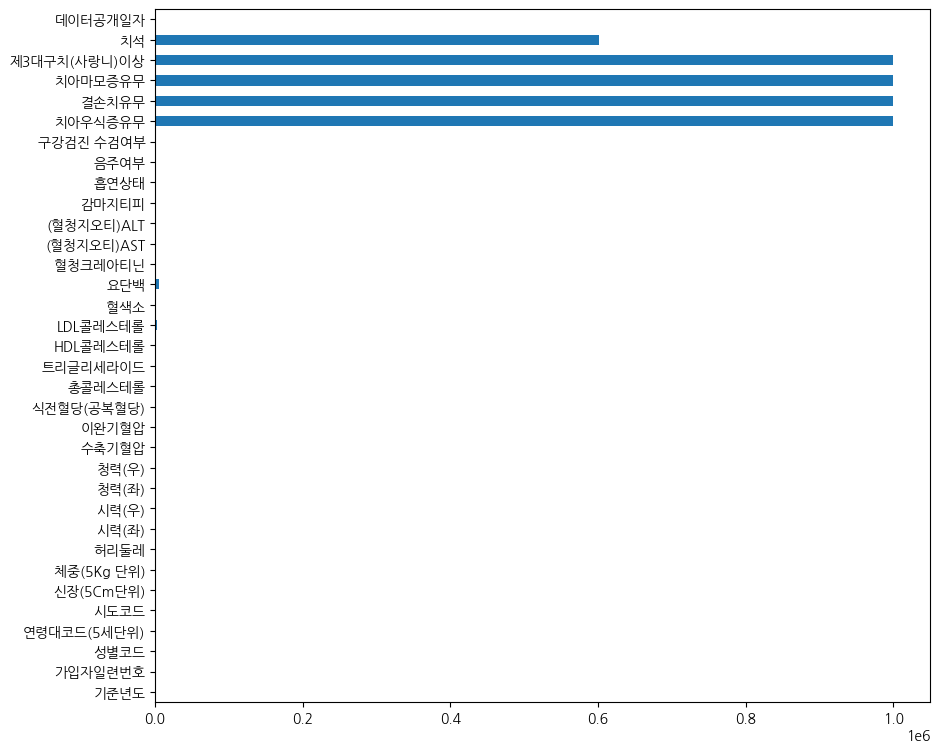

In [12]:
df.isnull().sum().plot.barh(figsize=(10, 9))

## 8. 일부 데이터 요약하기 

In [13]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]]

(혈청지오티)ALT  (혈청지오티)AST
0             41.0        19.0
1             13.0        16.0
2             62.0        45.0
3             24.0        21.0
4             62.0        37.0
...            ...         ...
999995        11.0        18.0
999996        11.0        21.0
999997        13.0        23.0
999998        30.0        28.0
999999        20.0        21.0

[1000000 rows x 2 columns]

In [14]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999956.000000  999958.000000
mean       25.859343      26.075068
std        25.814268      24.437136
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        30.000000      28.000000
max      6710.000000    9999.000000

## 9. 값 집계하기

In [15]:
df["성별코드"].value_counts()

성별코드
1    531172
2    468828
Name: count, dtype: int64

In [16]:
df["흡연상태"].value_counts()

흡연상태
1.0    608587
3.0    215061
2.0    176192
Name: count, dtype: int64

## 10. groupBy와 pivot_table 사용하기

### 10.1 groupby

In [17]:
df.groupby(["성별코드"]).mean()

기준년도        가입자일련번호  연령대코드(5세단위)      시도코드   신장(5Cm단위)  체중(5Kg 단위)  \
성별코드                                                                         
1     2017.0  499946.580386    10.324381  34.15184  168.516441   70.211016   
2     2017.0  500061.589758    10.783424  33.25853  155.078899   55.701656   

           허리둘레     시력(좌)     시력(우)     청력(좌)  ...      감마지티피      흡연상태  \
성별코드                                           ...                        
1     85.171843  1.035268  1.034448  1.032813  ...  49.446249  2.058548   
2     77.061441  0.915023  0.910340  1.031968  ...  23.396111  1.094082   

          음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  제3대구치(사랑니)이상        치석  \
성별코드                                                                         
1     0.670136   0.433298      NaN    NaN      NaN           NaN  0.640683   
2     0.300790   0.359603      NaN    NaN      NaN           NaN  0.549563   

         데이터공개일자  
성별코드              
1     20181126.0  
2     20181126.0  

[2 rows x 33 columns]

In [18]:
df.groupby(["성별코드"]).count()

기준년도  가입자일련번호  연령대코드(5세단위)    시도코드  신장(5Cm단위)  체중(5Kg 단위)    허리둘레  \
성별코드                                                                        
1     531172   531172       531172  531172     531098      531098  531102   
2     468828   468828       468828  468828     468640      468634  468458   

       시력(좌)   시력(우)   청력(좌)  ...   감마지티피    흡연상태    음주여부  구강검진 수검여부  치아우식증유무  \
성별코드                          ...                                               
1     531047  531055  531064  ...  531154  531120  530976     531172        0   
2     468665  468666  468694  ...  468801  468720  468499     468828        0   

      결손치유무  치아마모증유무  제3대구치(사랑니)이상      치석  데이터공개일자  
성별코드                                                 
1         0        0             0  230156   531172  
2         0        0             0  168592   468828  

[2 rows x 33 columns]

In [19]:
df.groupby(["성별코드"])["가입자일련번호"].count() #남성, 여성이 얼마나 되는지

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [20]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count() #성별코드에 따라 음주 상태
# 남자가 음주하는 경우가 더 많고, 여자가 음주를 하지 않는 경우가 더 많다는 것을 알 수 있습니다.

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [21]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()
# 음주하고 있는 사람들이 감마지티피 수치가 더 높게 나옴

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

### 10.2 pivot_table
- pivot_table의 연산 속도가 groupby보다 빠르고, 사용 방법이 직관적입니다.
- 기본적으로 dataframe으로 결과가 출력

In [22]:
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")

가입자일련번호
성별코드         
1      531172
2      468828

In [23]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

가입자일련번호
음주여부         
0.0    502729
1.0    496746

In [24]:
pd.pivot_table(df, index="음주여부", values="감마지티피") #기본적으로 평균값

감마지티피
음주여부           
0.0   26.858541
1.0   47.745678

In [25]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.858541   19.0
1.0   47.745678   30.0

In [26]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부                                                              
0.0   14.0  19.0  29.0  502698.0  999.0  26.858541  1.0  30.687404
1.0   19.0  30.0  53.0  496732.0  999.0  47.745678  1.0  63.103844

In [27]:
pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
0.0  1     18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     2     13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
1.0  1     24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
     2     13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

## 11. 전체 데이터 시각화 하기 

### 11.1 히스토그램
- 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화해서 도수분포표를 만들고 그 결과를 시각화함
- 히스토그램은 연속된 데이터를 카테고리형으로 만듭니다. 
- df.hist()를 변수에 넣으면 출력값 없이 바로 시각화를 출력

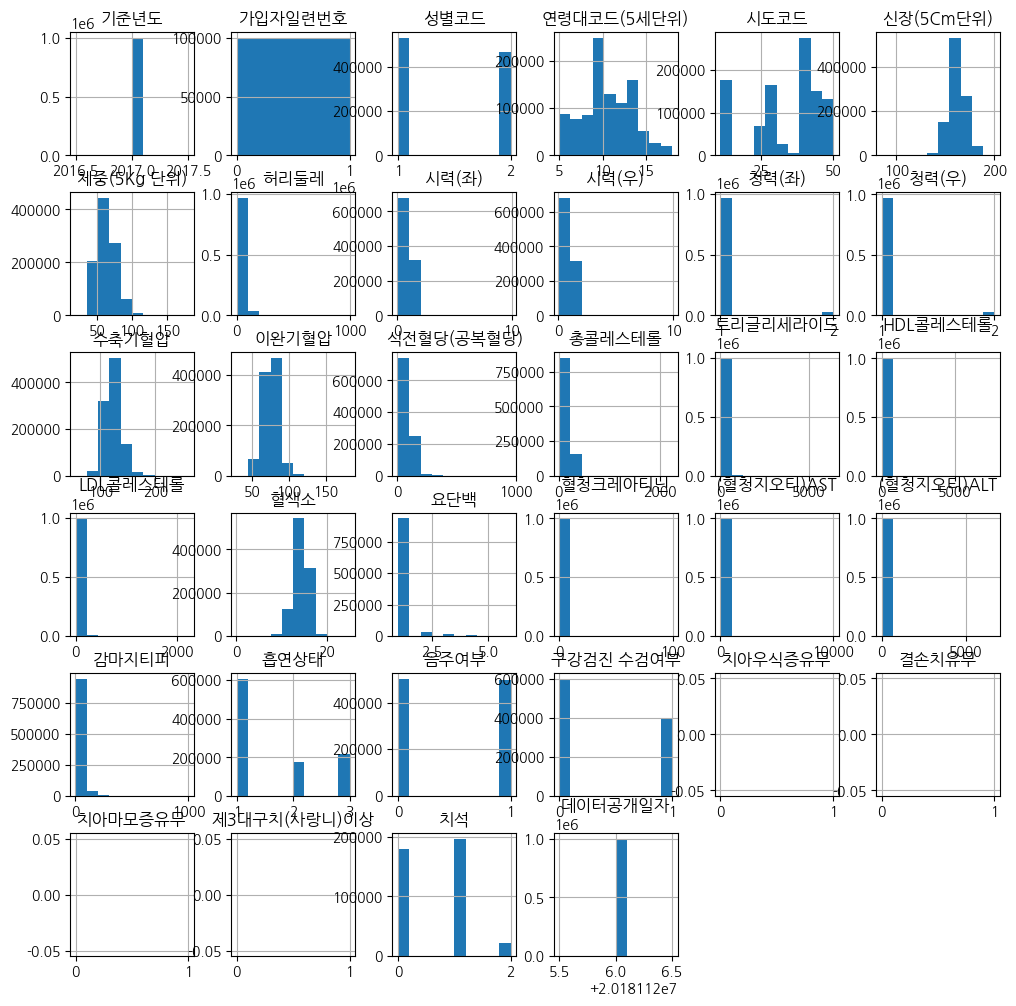

In [28]:
h = df.hist(figsize=(12, 12))

### 11.2 슬라이싱을 사용해 히스토그램 그리기 

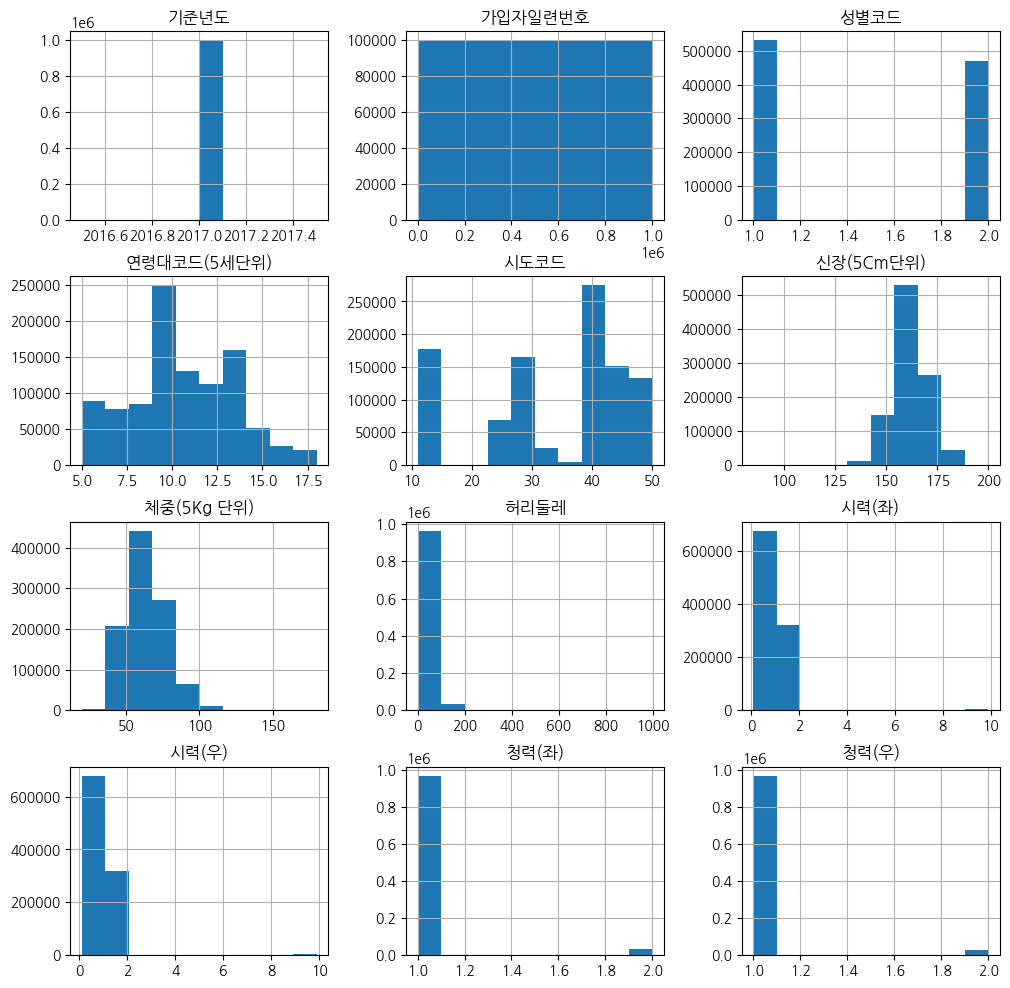

In [29]:
h = df.iloc[:, :12].hist(figsize=(12, 12))
# iloc[]를 통해 몇 번째에 있는 특정한 행, 열을 사용할 것인지 지정
# "가입자일련번호", "기준년도", "성별코드"는 크게 의미가 없고, "시력(좌)", "시력(우)"는 이상치 때문에 10까지

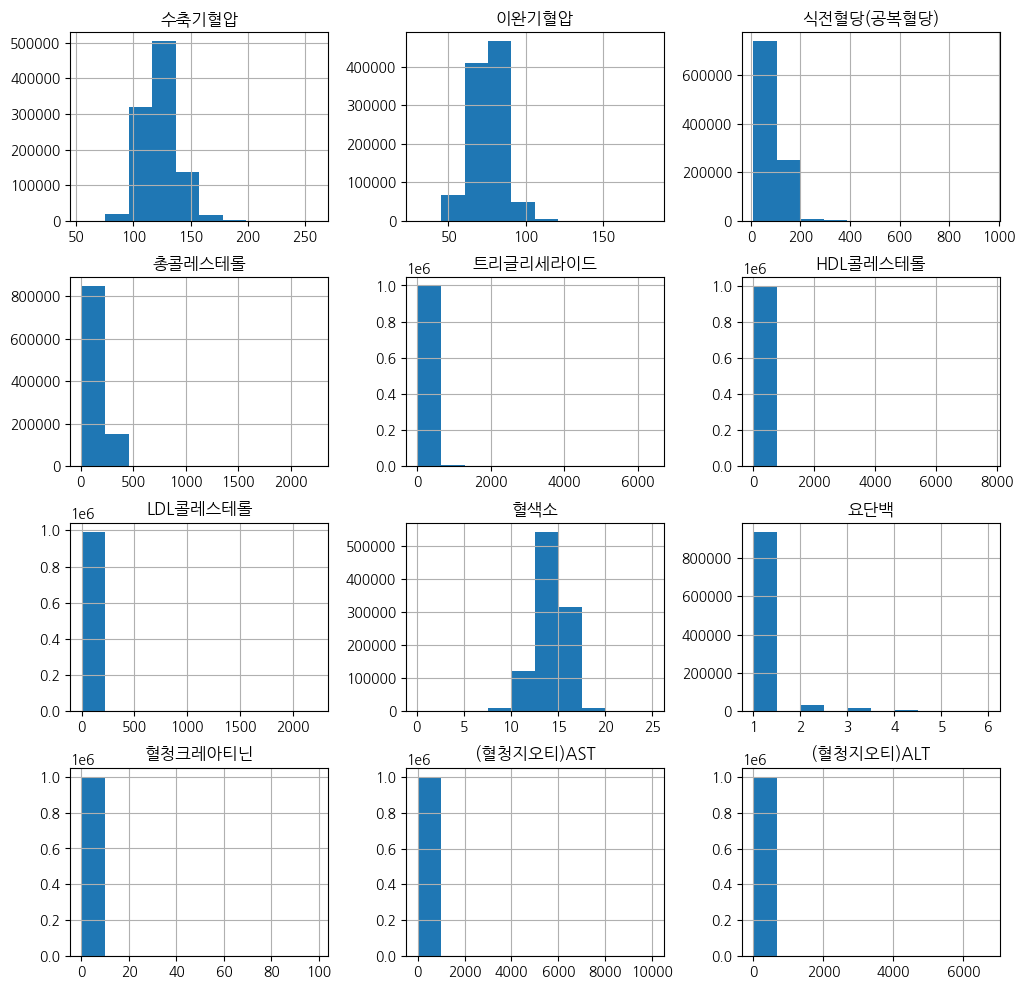

In [30]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12))
# 12번째 행부터 23번째 행까지

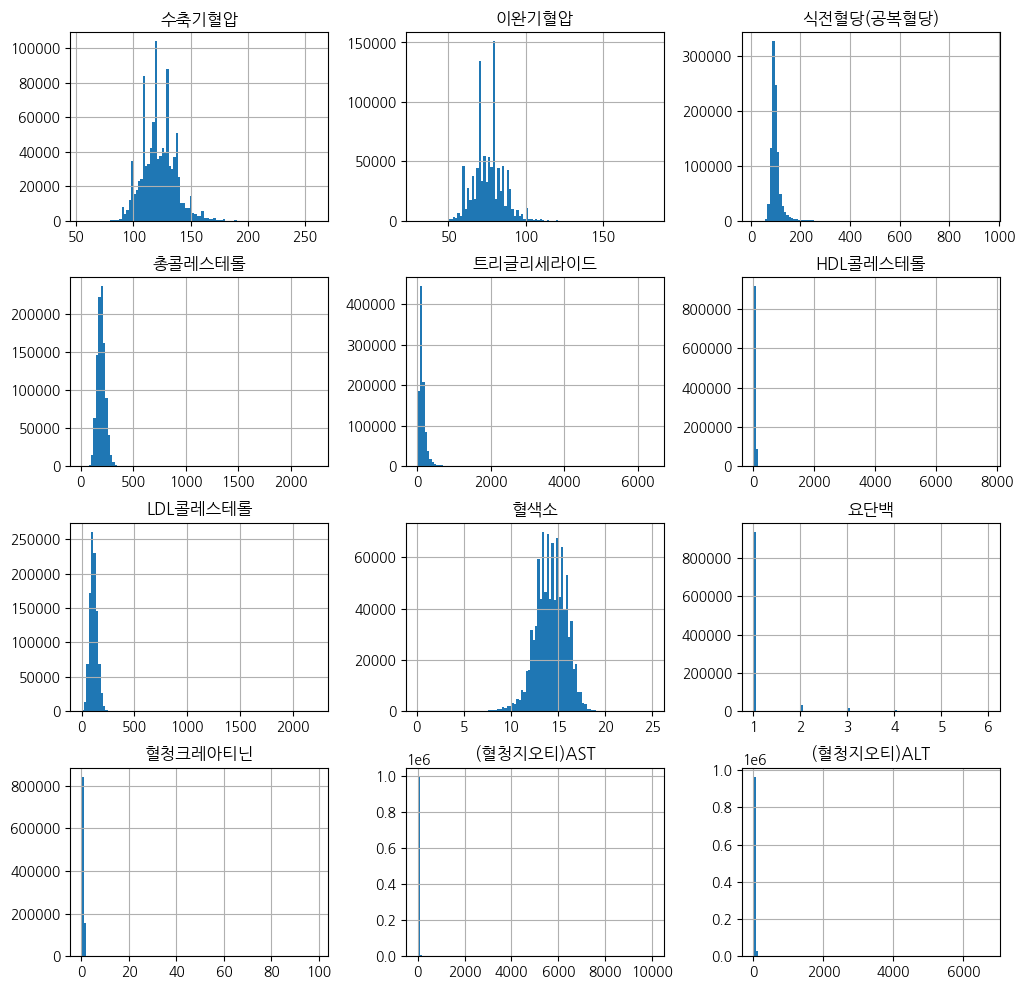

In [31]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)
# bins 옵션으로 막대의 개수를 잘게 그림

## 12. 샘플데이터 추출하기  
- seaborn의 그래프는 내부에서 수학적 연산이 되기 때문데 데이터가 많으면 속도가 오래 걸림 
- 시간이 오래 걸리기 때문에 데이터의 샘플로 그려야 함

In [32]:
df_sample= df.sample(1000, random_state=1)
df_sample.shape
# random_state=1을 사용하면 1,000,000개 중 랜덤으로 정해준 개수만큼 가져

(1000, 34)

## 13. 데이터 시각화 도구 seaborn 사용하기 
- seaborn은 matplotlib을 쉽게 쓸 수 있는 highlevel interface고, 통계 지식 없이 고급 통계 그래프를 구현
- 범주형 데이터, 수치형 데이터에 따라 시각화에 접근하는 방식이 달라짐

## 14. 범주형(카데고리) 데이터 시각화 
- countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현
- value_counts로 구한 값을 시각화 한다고 생각하면 됨

### 14.1 countplot-음주여부

<Axes: xlabel='음주여부'>

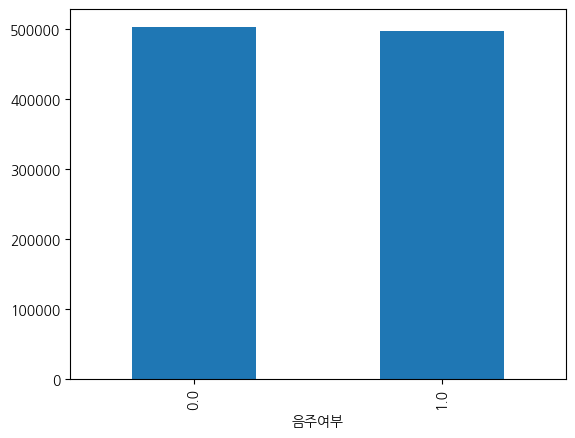

In [33]:
df["음주여부"].value_counts().plot.bar()

<Axes: xlabel='음주여부', ylabel='count'>

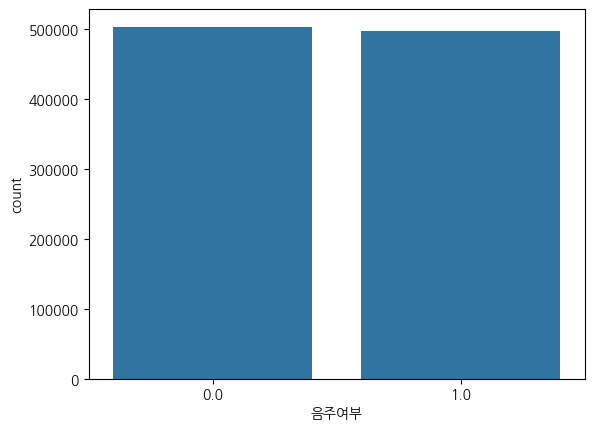

In [34]:
sns.countplot(x="음주여부", data=df)

### 14.2 hue 옵션 사용하기 

<Axes: xlabel='음주여부', ylabel='count'>

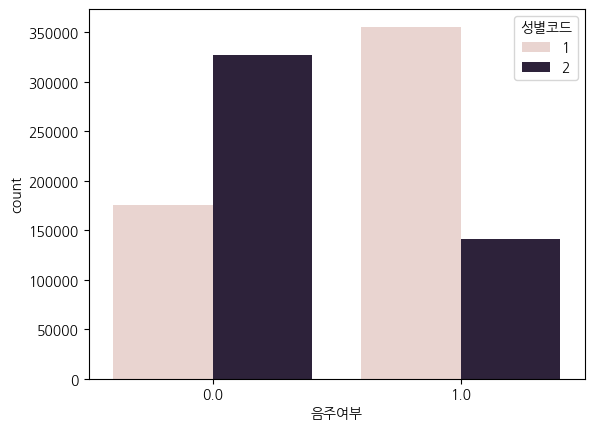

In [35]:
sns.countplot(x="음주여부", data=df, hue="성별코드")
# hue를 사용하여 성별코드로 색상을 구분하여 그림

In [36]:
sns.set(font_scale=1.5, font="Malgun Gothic")
# seaborn에서 옵션 값들이 적용하여 사용할 수 있습니다.

<Axes: xlabel='연령대코드(5세단위)', ylabel='count'>

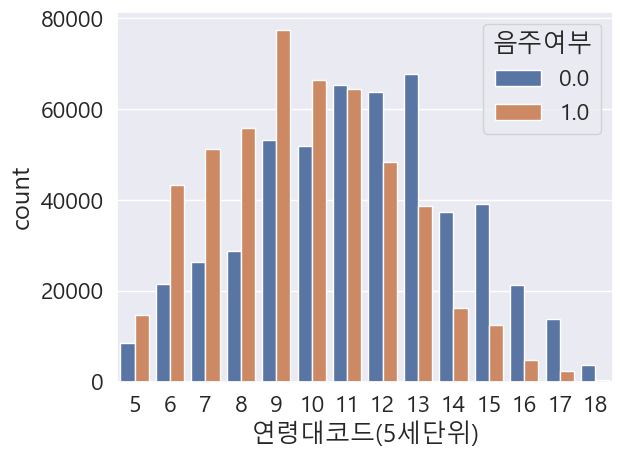

In [37]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")
# 키와 몸무게는 연속형 데이터라고 볼 수 있지만 특정 범위로 묶는다면 범주형 데이터로 볼 수 있습니다.

### 14.3 countplot-키와 몸무게

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

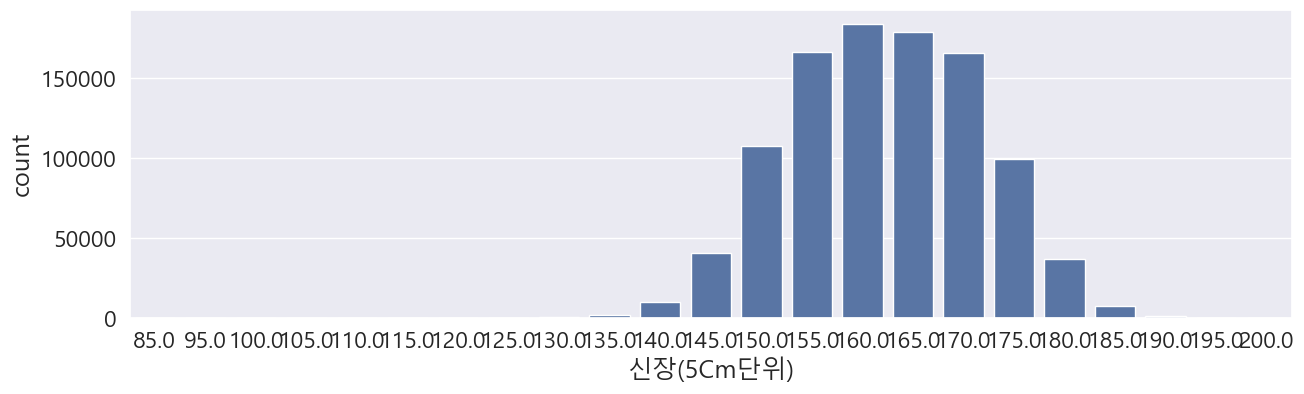

In [38]:
plt.figure(figsize=(15,4)) # plt.figure으로 크기를 조절

sns.countplot(data=df, x="신장(5Cm단위)")

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

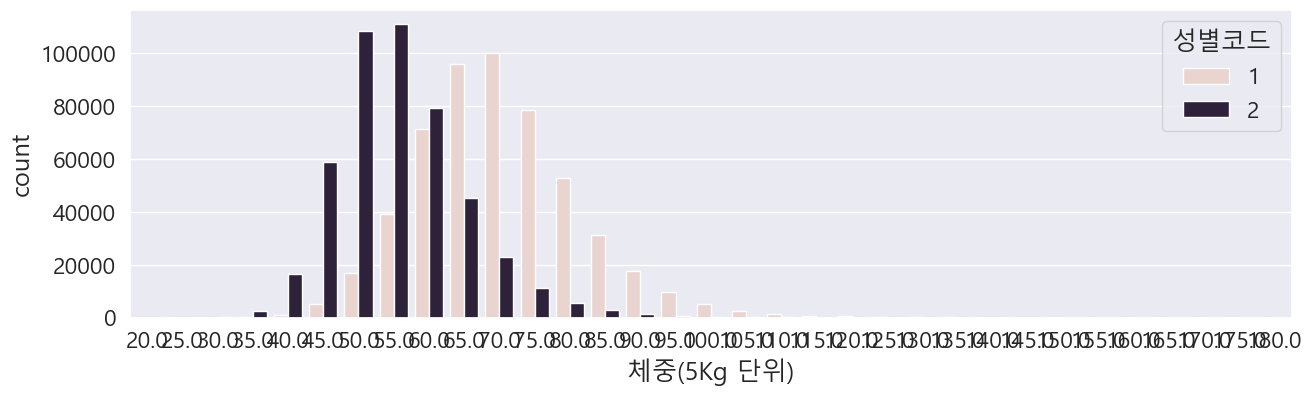

In [39]:
plt.figure(figsize=(15,4))

sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

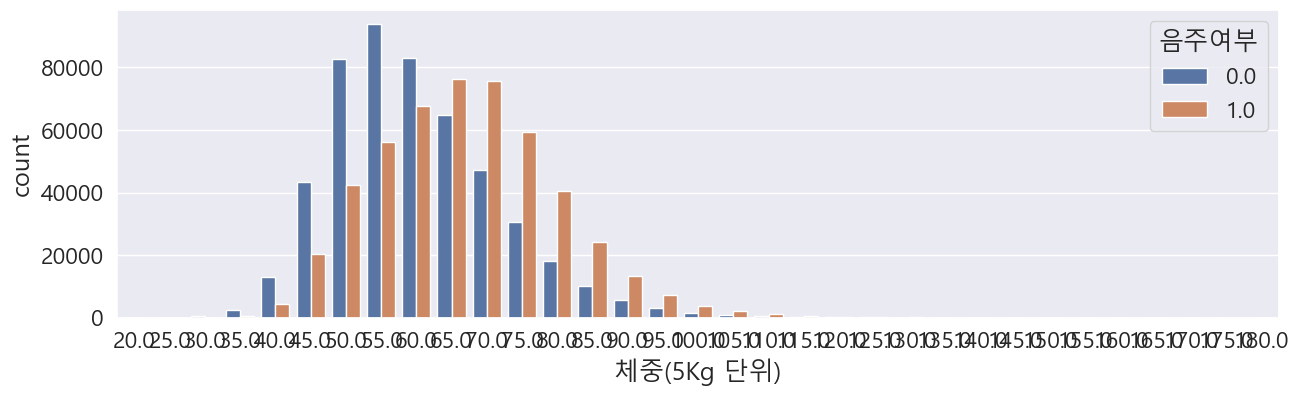

In [40]:
#  음주여부에 따라 체중의 차이를 확인
plt.figure(figsize=(15,4))

sns.countplot(data=df, x="체중(5Kg 단위)", hue="음주여부")

### 14.4 barplot-수치형 vs 범주형 데이터 시각화

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

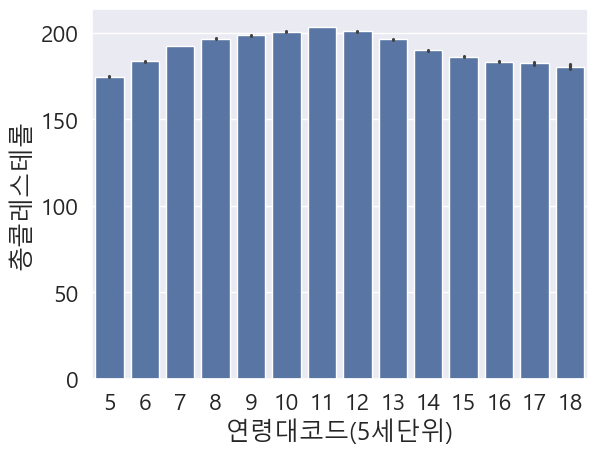

In [41]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤")

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

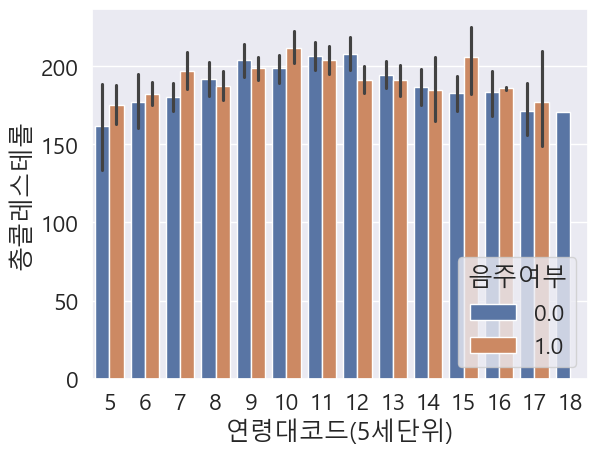

In [42]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

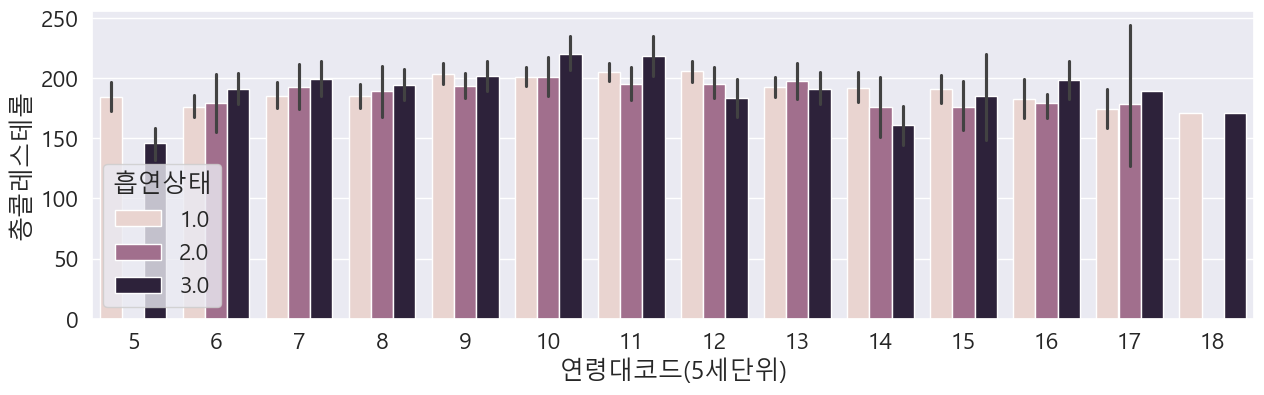

In [43]:
plt.figure(figsize=(15,4))

sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

### 신뢰구간 
- ci는 신뢰구간 수준 
- 95%의 신뢰구간을 지정하고 싶다면 95를 입력

<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

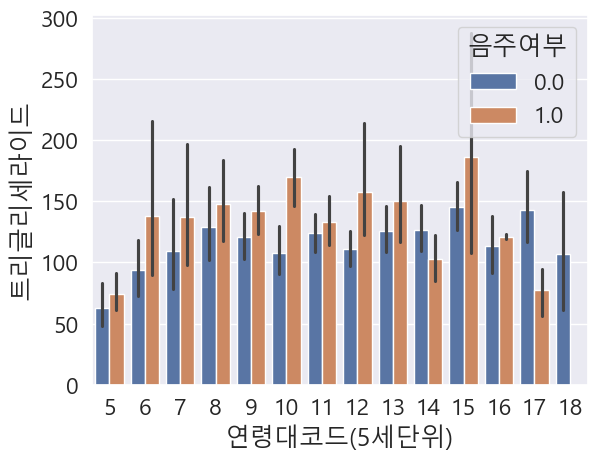

In [62]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", errorbar=('ci', 95))


C:\Users\user\AppData\Local\Temp\ipykernel_31088\901210178.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci='sd')


<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

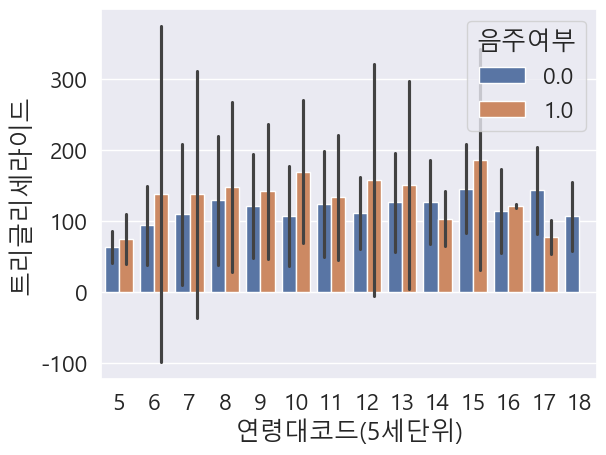

In [63]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci='sd')
# 음주를 하는 사람이 트리글리세라이드(중성지방수치)가 높은 경향

C:\Users\user\AppData\Local\Temp\ipykernel_31088\1580039840.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

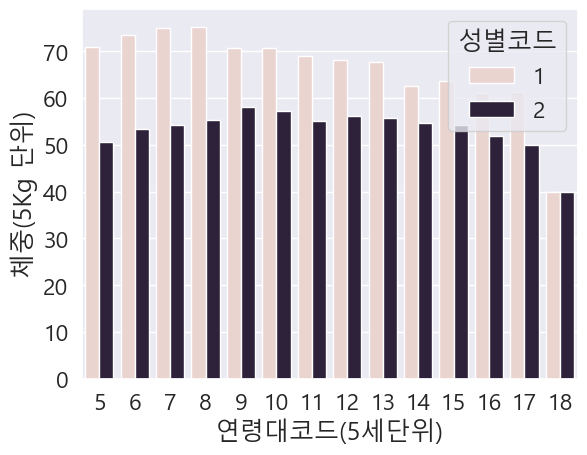

In [46]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci=None)
# 신뢰구간을 표시하고 싶지 않다면 None
# 음주를 하는 사람들이 체중이 많이 나가는 경향

### 14.5 lineplot, pointplot
- 선그래프인 lineplot과 pointplot
- barplot은 막대로 개별값을 표현하는데  lineplot, pointplot을 통해서는 선으로 기울기까지 표현할 수 있습니다. 가격 데이터, 매출/재고 데이터는 대체로 lineplot, pointplot으로 그리는 것이 좋습니다.

#### lineplot
- lineplot은 편차와 신뢰구간을 그림자로 표현

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

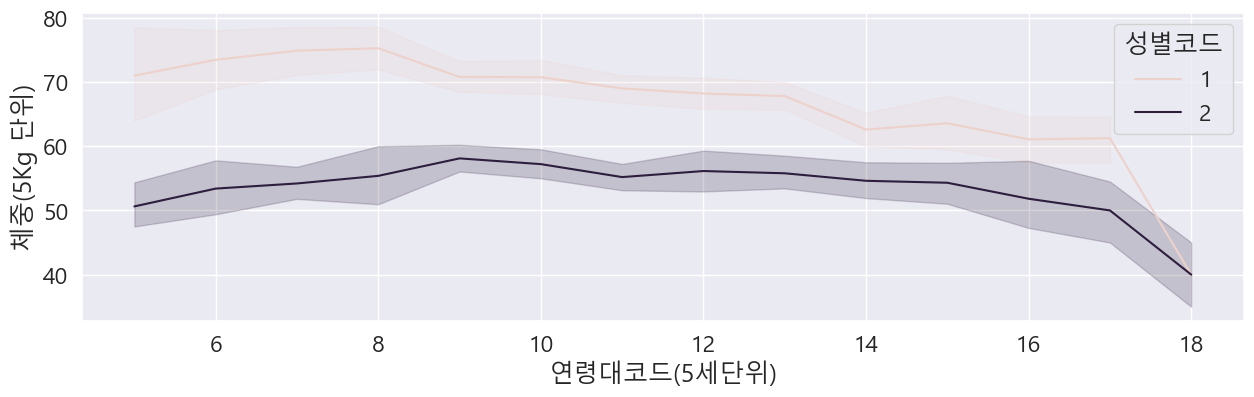

In [47]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드")
# 나이가 커질수록 신장이 조금씩 작아집니다.

In [48]:
df_sample.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

C:\Users\user\AppData\Local\Temp\ipykernel_31088\4250823908.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

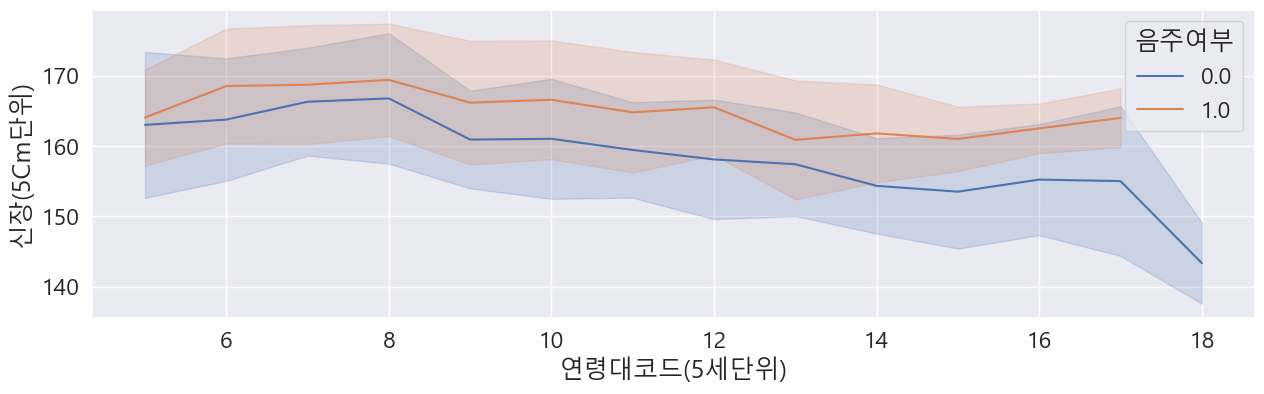

In [49]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

#### pointplot
- pointplot은 막대를 통해 편차와 신뢰구간를 표현

In [50]:
#conda create -n myenv python=3.8

In [51]:
#conda activate myenv

In [52]:
#pip install --upgrade seaborn

C:\Users\user\AppData\Local\Temp\ipykernel_31088\3682395531.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci='sd')


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

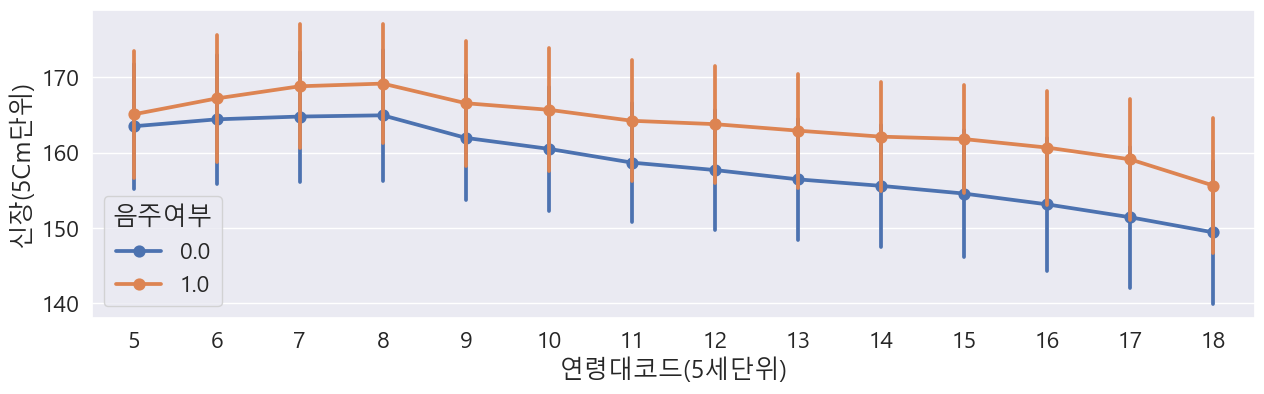

In [53]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci='sd')

C:\Users\user\AppData\Local\Temp\ipykernel_31088\621429482.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

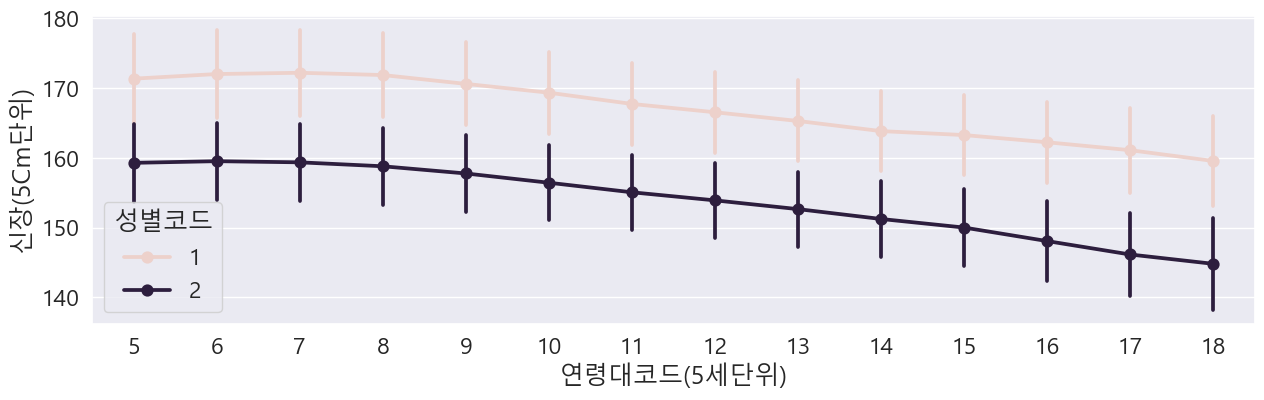

In [54]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

C:\Users\user\AppData\Local\Temp\ipykernel_31088\2169983765.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

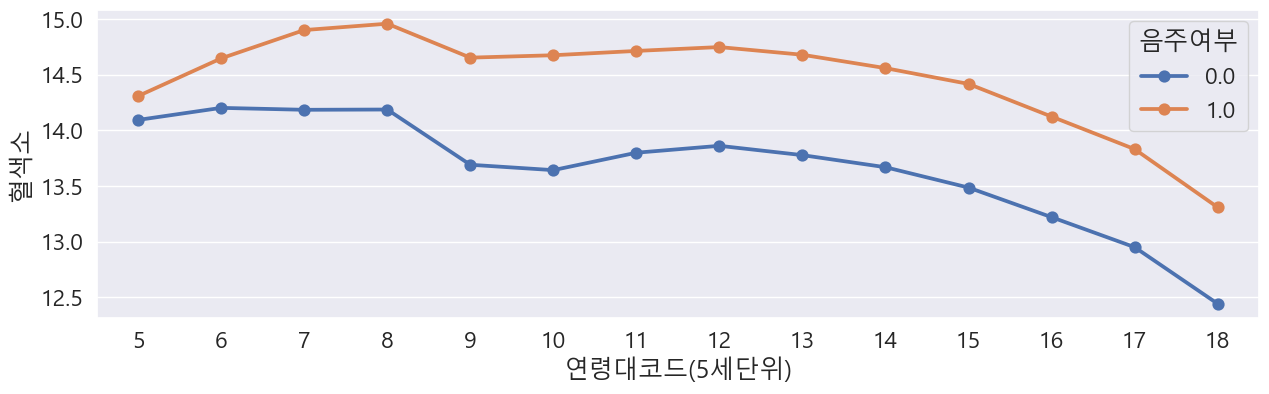

In [55]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)
# 연령대가 높아질수록 혈색소가 줄어들고 있습니다.
#음주를 하면 혈색소가 평균적으로 더 높습니다.

C:\Users\user\AppData\Local\Temp\ipykernel_31088\1900270460.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
C:\Users\user\AppData\Local\Temp\ipykernel_31088\1900270460.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

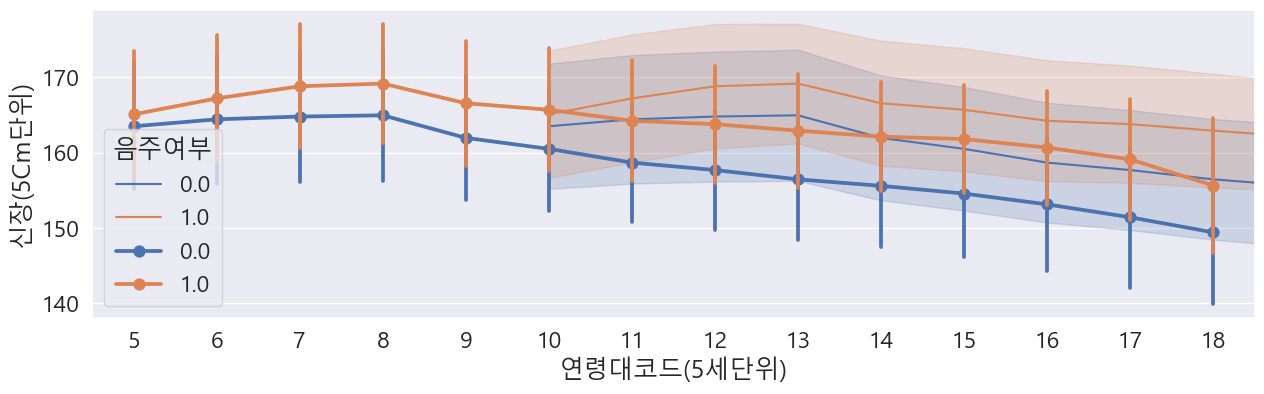

In [56]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

### 14.6 boxplot
- 사분위수 범위(IQR)은 3사분위수 - 1사분위수입니다. 3사분위수보다 1.5 x IQR 이상을 초과하는 값과 Q1보다 1.5 x IQR 이상 미달하는 값은 이상치입니다. 점, 원, 별표 모양으로 표현합니다.
- boxplot을 그리면 이상치를 확인하기 좋습니다.

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

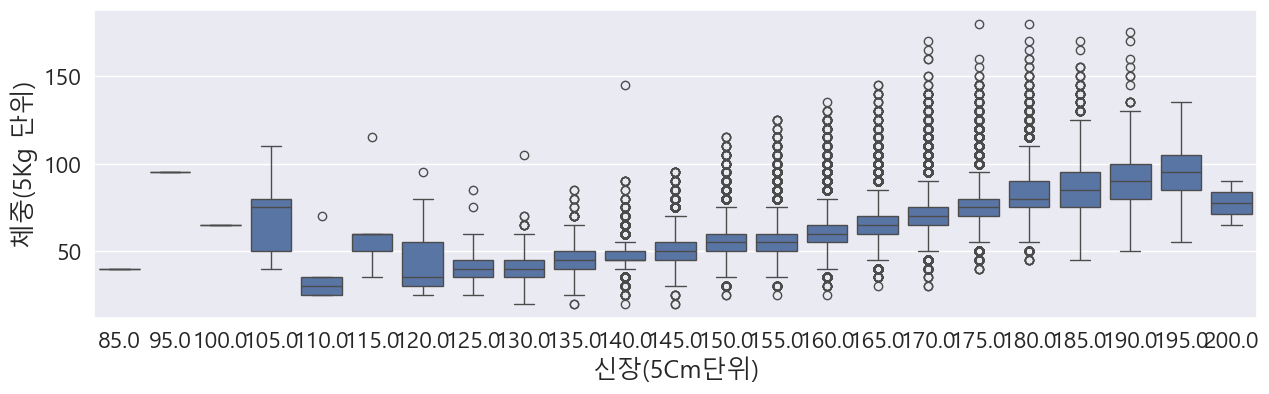

In [57]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

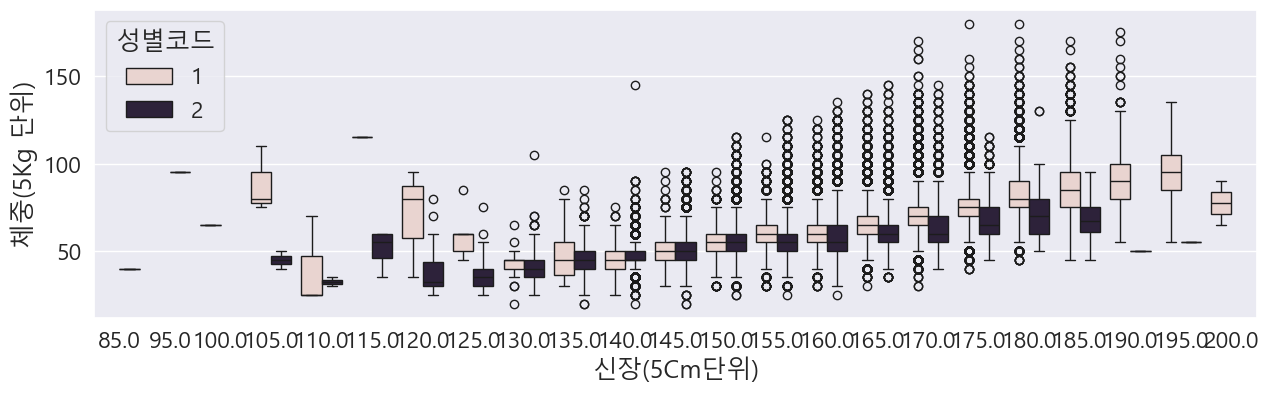

In [64]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

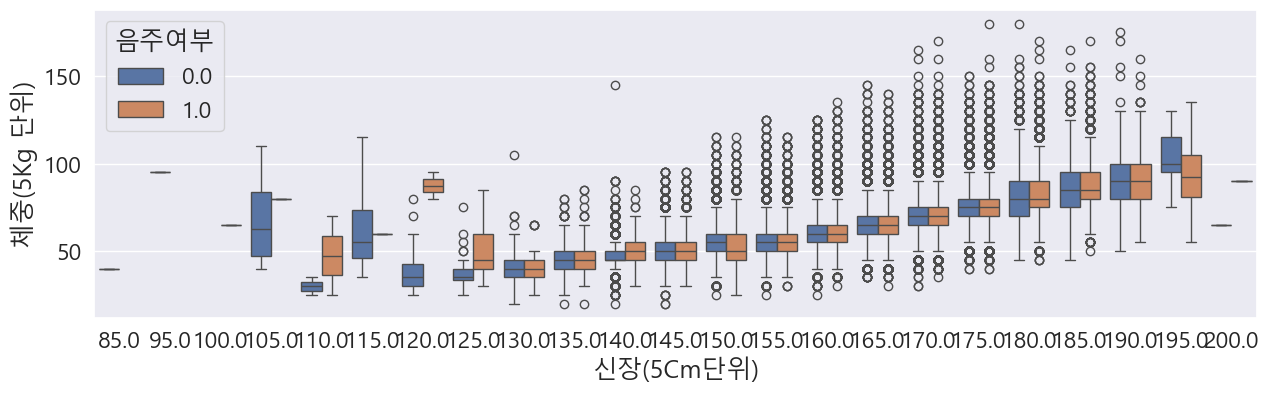

In [65]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

### 14.7 violinplot
- boxplot의 단점을 보완하여 더 자세하게 보여주는 그래프
- . violinplot은 분포를 더 자세히 볼 수 있습니다.

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

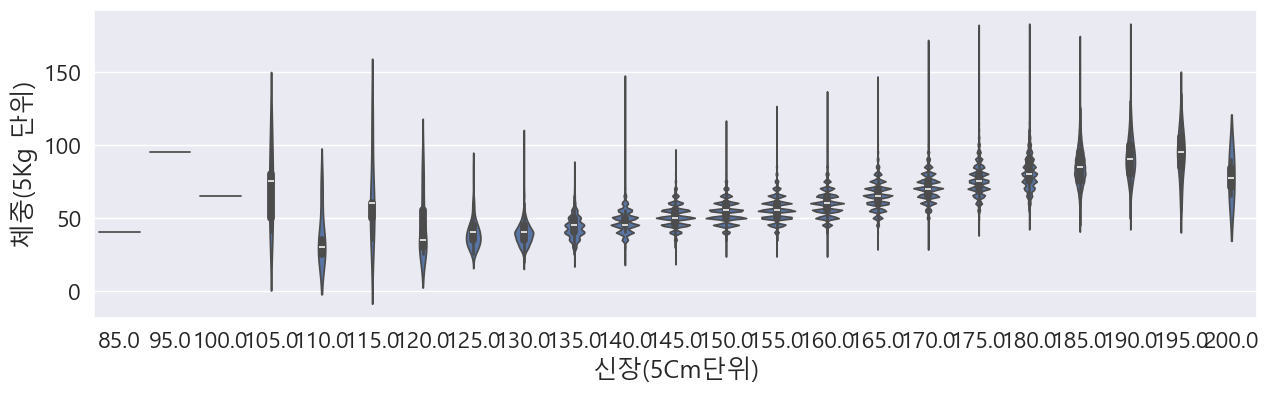

In [66]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

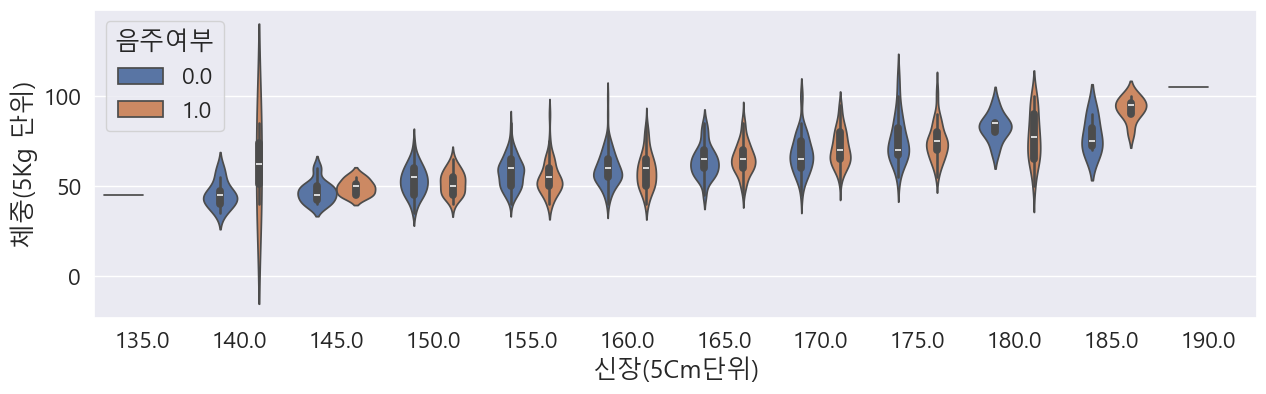

In [67]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

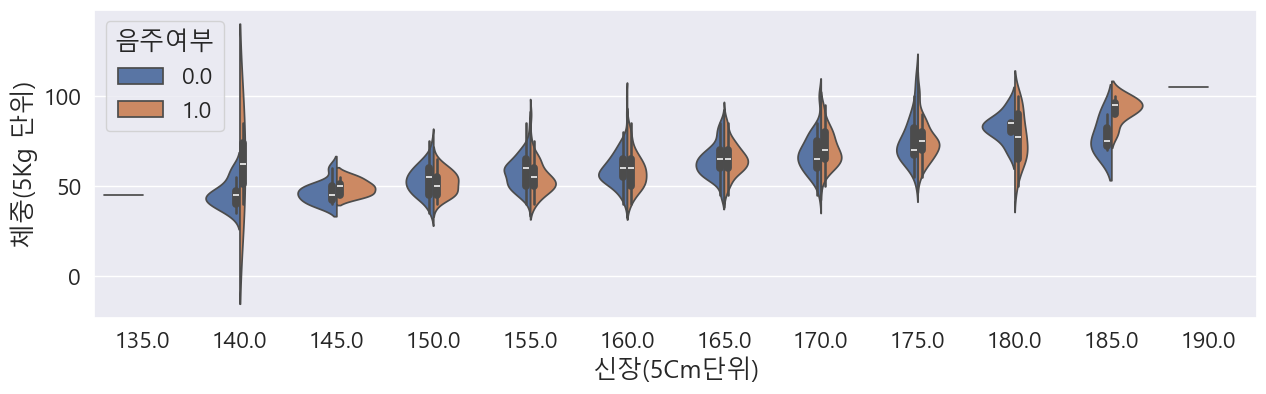

In [68]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", split=True)
# split 옵션을 이용하면 두 개의 데이터를 붙여서 볼 수 있다

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

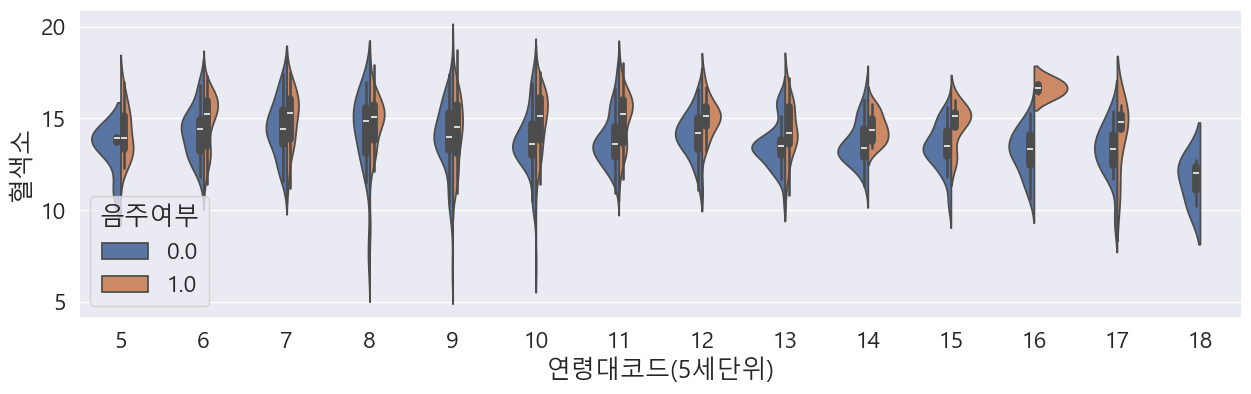

In [70]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)
# x축의 16에서 보면 음주하는 사람들의 값이 확연히 높고, 전체적으로 더 위에 분포하는 것을 볼 수 있다.

### 14.8 swarm plot
- 산점도를 통해 데이터를 찍어볼 수 있다
- 분포를 보고 싶다면 swarmplot을 사용하는 게 좋습니다.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 48.0% of the points cann

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

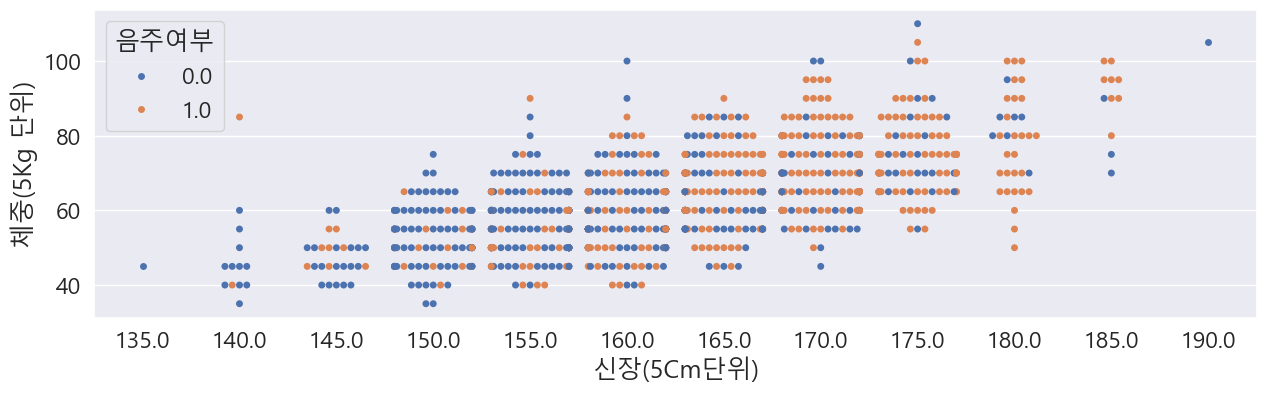

In [71]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 48.0% of the points cann

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 48.0% of the points cann

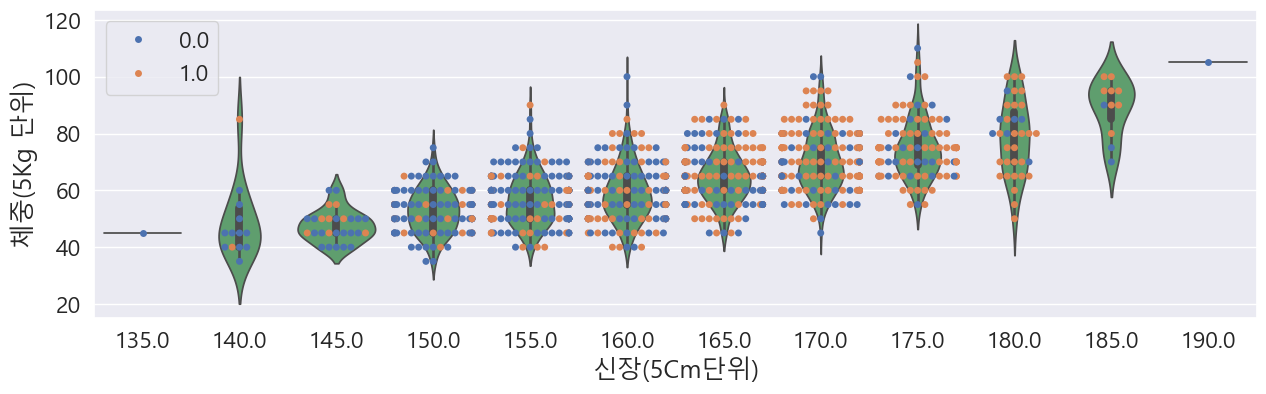

In [72]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)")

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


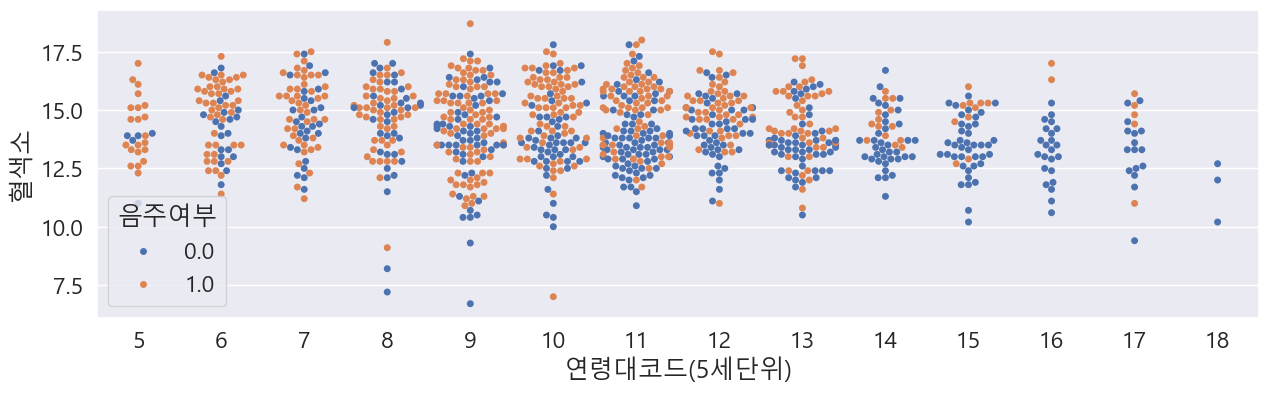

In [73]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

### 14.9 lmplot
- scatterplot과는 다르게 회귀선을 확인해볼 수 있다.
- 회귀선을 그리거나 다변수 시각화를 할 때 좋습니다.
- x축에도 수치형 데이터를 넣어도 되지만 막대가 너무 많으면 보기에 불편합니다. 
- barplot을 기울기로 보고 싶다면 lineplot이 좋습니다.

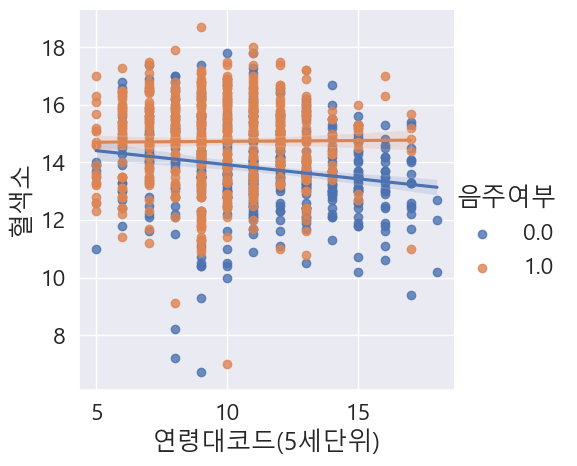

In [74]:
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

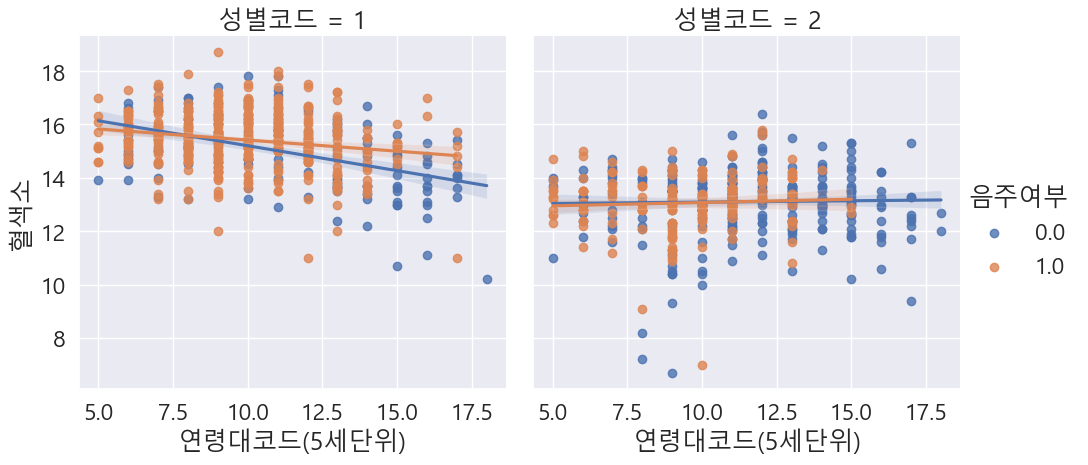

In [76]:
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")
# col이란 옵션으로 색상으로 다르게 하여 데이터를 분류하여 볼 수 있다.

## 수치형 데이터 시각화 

### 15.1 scatterplot - 산점도 
- 수치형 vs 수치형 데이터의 상관관계를 볼때 주로 사용
- 점이 크기를 데이터의 수치에 따라 다르게 볼 수 있음
- scatterplot을 활용하면 그래프의 이상치를 파악하기 쉽다.
- scatterplot은 x, y가 모두 수치형 데이터일 때 그릴 수 있음

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

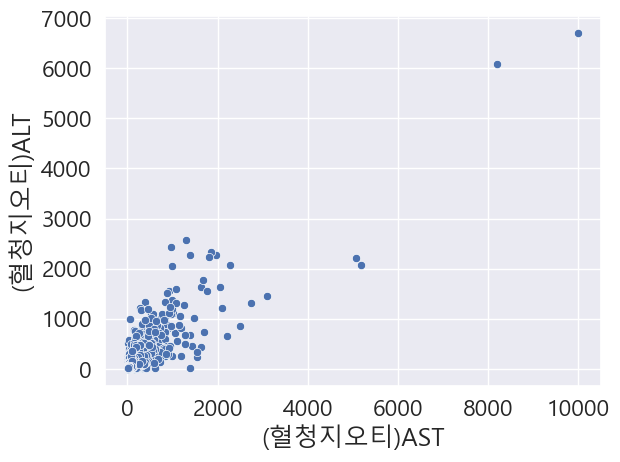

In [77]:
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT")

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

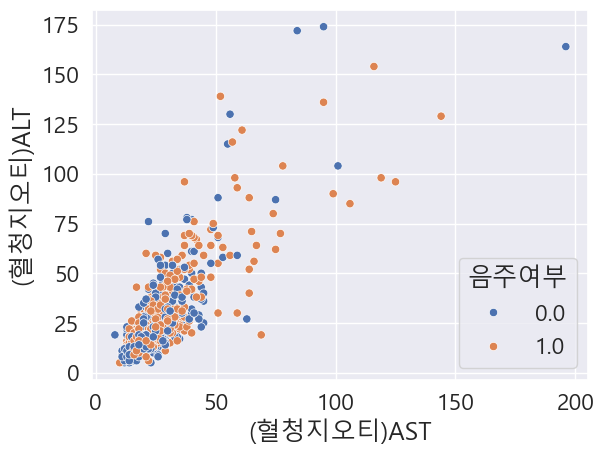

In [78]:
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

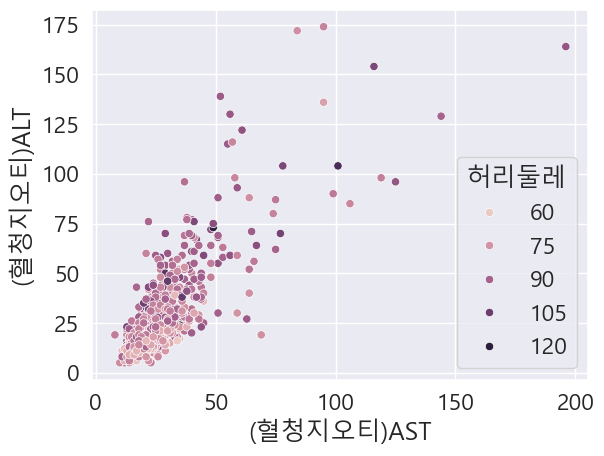

In [79]:
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="허리둘레")
# 연속형 데이터도 가능

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

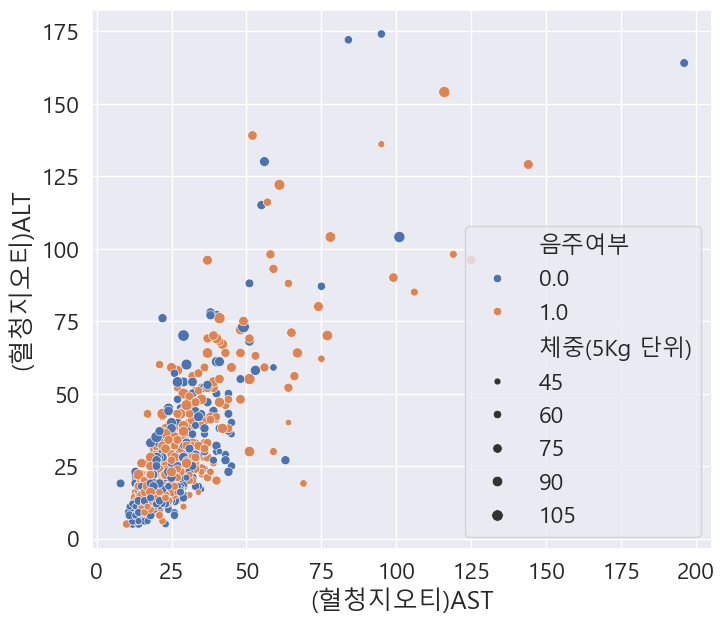

In [80]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg 단위)")
# size라는 옵션으로 체중에 따라 크기를 다르게 지정할 수 있습니다.

### 15.2 lmplot - 상관 관계를 보기 

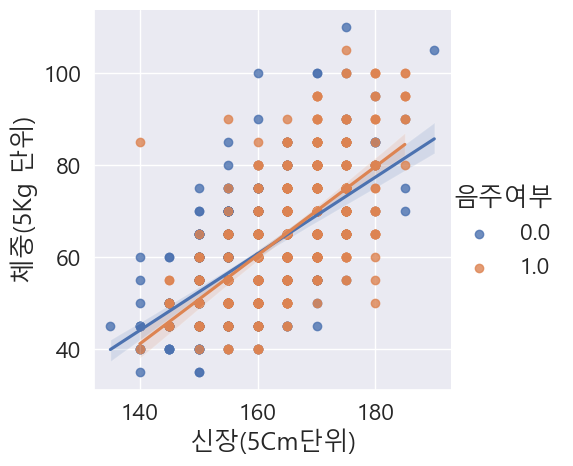

In [81]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

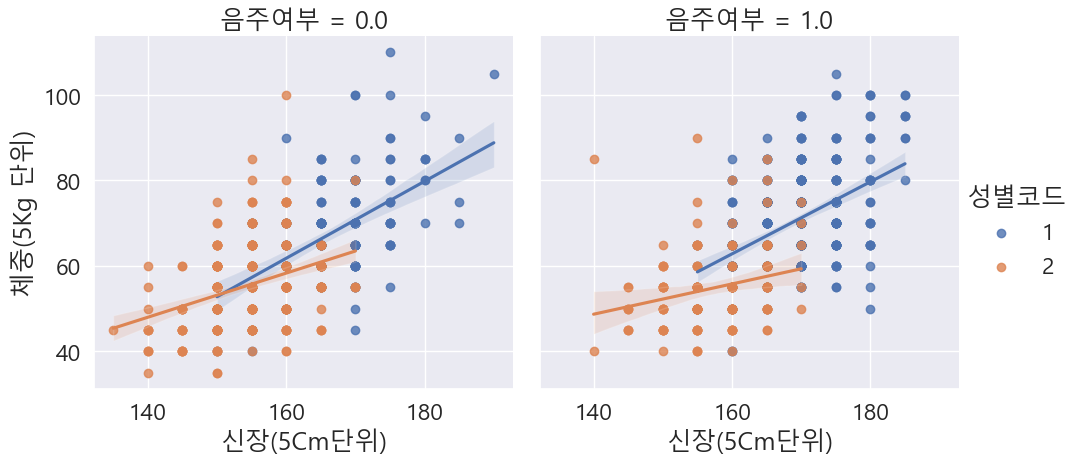

In [84]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드", col="음주여부")
# 왼쪽 아래에서 오른쪽 위로 선이 그려지면 양의 상관관계가 있다고 표현합니다.

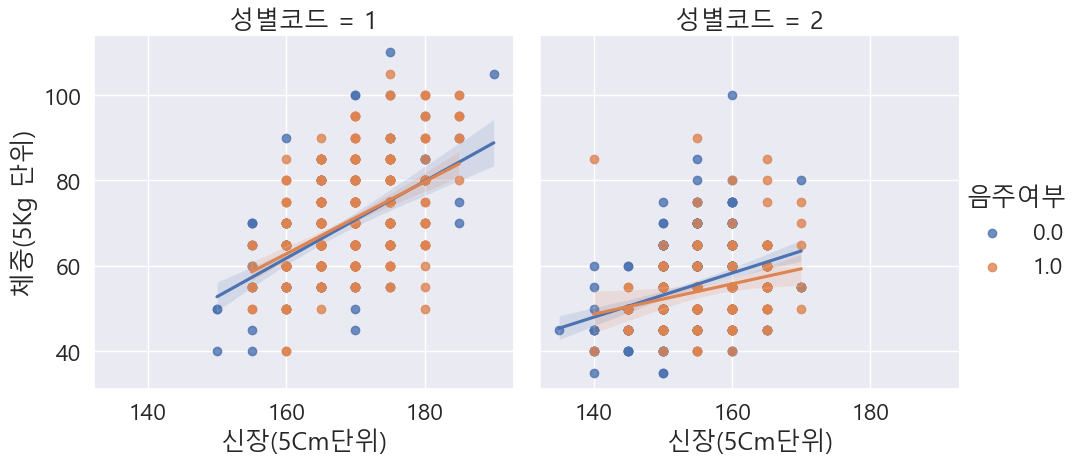

In [85]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", col="성별코드")
# 여성의 경우에는 음주 여부에 따라 신장과 체중의 상관관계가 높은 것으로 보여집니다.

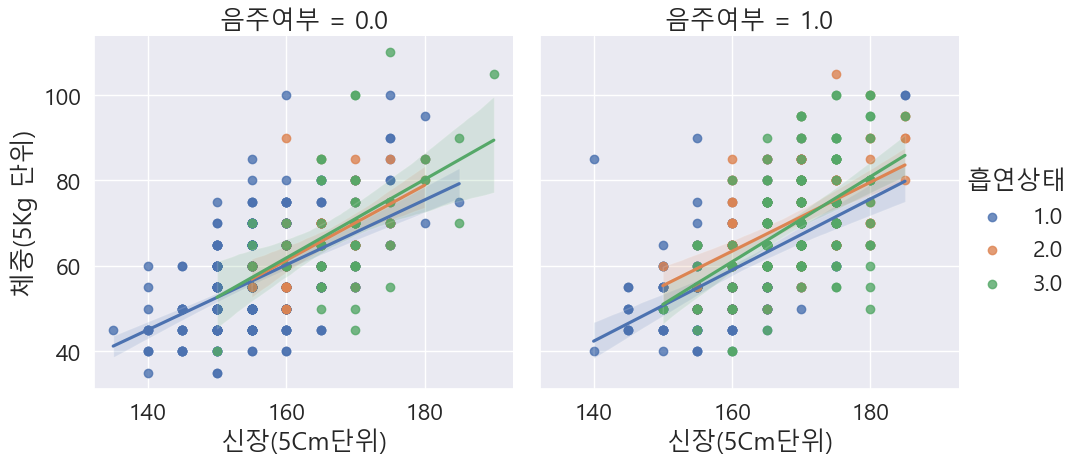

In [88]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="흡연상태", col="음주여부")


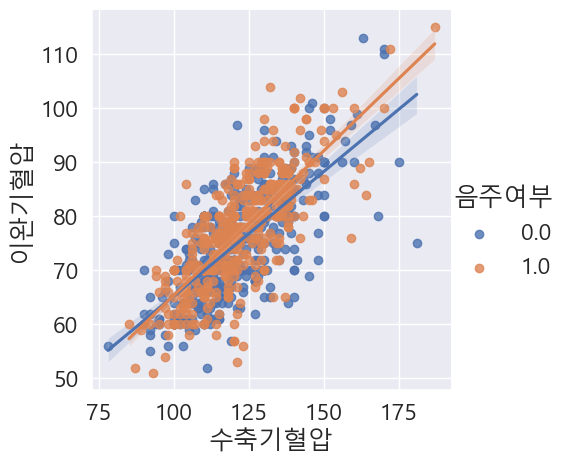

In [89]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")
# 음주여부에 따라 건강검진 수치가 차이가 있습니다.

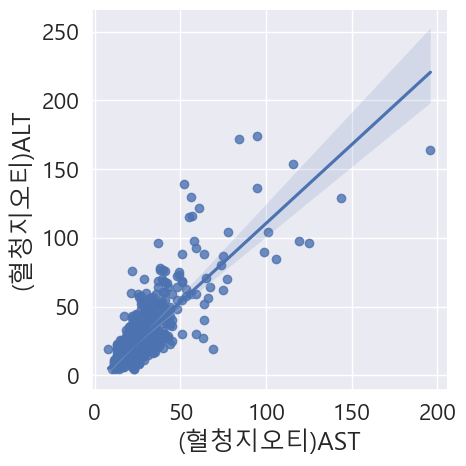

In [90]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT")
# 두 특성은 강한 상관관계를 보입니다.

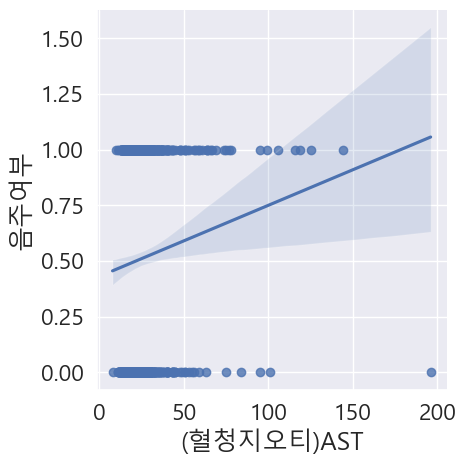

In [91]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="음주여부")
# 음주여부에 따라서도 차이가 있지만 이상치가 있습니다.

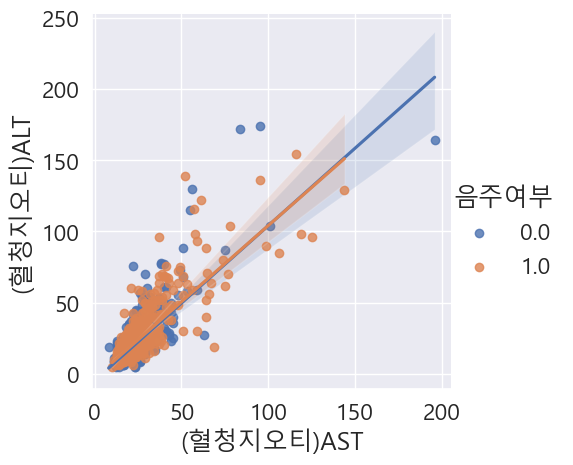

In [93]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)
# robust라는 옵션을 활용하면 이상치를 빼고 그립니다.
# 이상치가 있으면 회귀선이 영향을 많이 받으므로 robust 옵션을 사용해주는 것이 좋습니다.

### 15.3 이상치 다루기 
- 이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 함
- 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도로 한다.

In [105]:
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]
df_ASLT[:2]

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
276826  2017   276827     2           12    11      155.0        85.0  113.0   
849425  2017   849426     2           15    11      155.0        45.0   73.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
276826    0.7    1.0  ...   35.0   1.0   0.0          0      NaN    NaN   
849425    0.5    0.4  ...   19.0   1.0   0.0          1      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  0.0  20181126  

[2 rows x 34 columns]

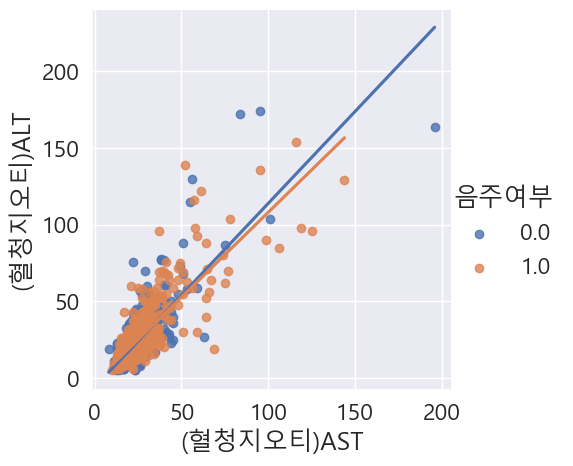

In [96]:
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [111]:
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high[:2]

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
2771  2017     2772     1            8    44      170.0        65.0  82.2   
5047  2017     5048     1            7    31      170.0        60.0  77.0   

      시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
2771    1.0    0.9  ...  280.0   3.0   1.0          0      NaN    NaN   
5047    1.5    1.5  ...   33.0   1.0   1.0          1      NaN    NaN   

      치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
2771      NaN           NaN  NaN  20181126  
5047      NaN           NaN  0.0  20181126  

[2 rows x 34 columns]

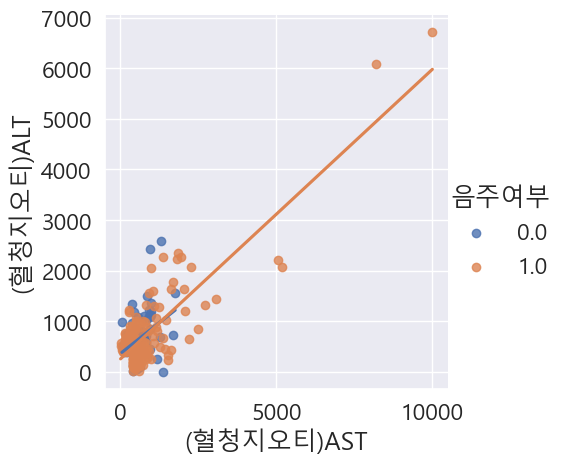

In [113]:
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [114]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

청력(좌)  청력(우)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  \
677177    2.0    2.0  100.0   60.0       107.0   129.0     152.0      30.0   
887237    1.0    1.0   97.0   71.0        86.0   158.0     111.0     100.0   

        LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태  \
677177      69.0  13.0  1.0      1.2      8200.0      6080.0  888.0   1.0   
887237      35.0  17.8  3.0      0.8      9999.0      6710.0  379.0   3.0   

        음주여부  
677177   1.0  
887237   1.0

### 15.3 distplot
- distplot은 히스토그램을 그려줍니다. 
- 히스토그램은 도수분포표에 따라 그림을 그리는 것을 말합니다. 계급에 따라 데이터의 개수를 세주는 것입니다.
- distplot은 다른 그래프와는 사용법이 조금 다릅니다.
- distplot은 결측치가 있으면 그릴 수 없습니다.
- distplot은 series 데이터를 넣어줘야 합니다.

In [115]:
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol.head()

0    178.0
1    255.0
2    211.0
3    160.0
4    253.0
Name: 총콜레스테롤, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_31088\2745480377.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chol)


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

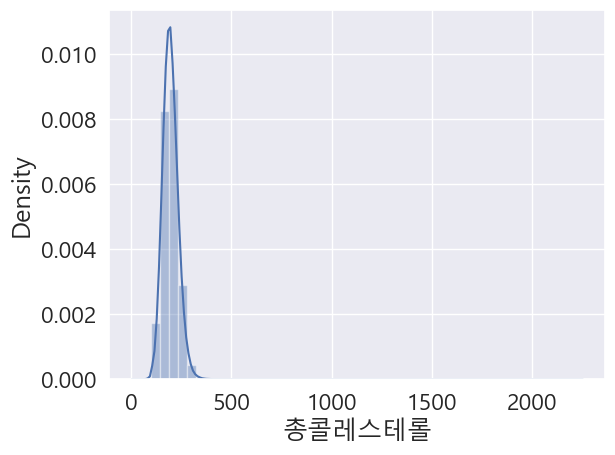

In [117]:
sns.distplot(df_chol)
# 히스토그램은 막대를 나타내고, 히스토그램을 부드러운 곡선으로 처리해주는 것이 확률밀도함수입니다.
# 왜도와 첨도도 확인할 수 있습니다.

C:\Users\user\AppData\Local\Temp\ipykernel_31088\471570912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chol, bins=10)


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

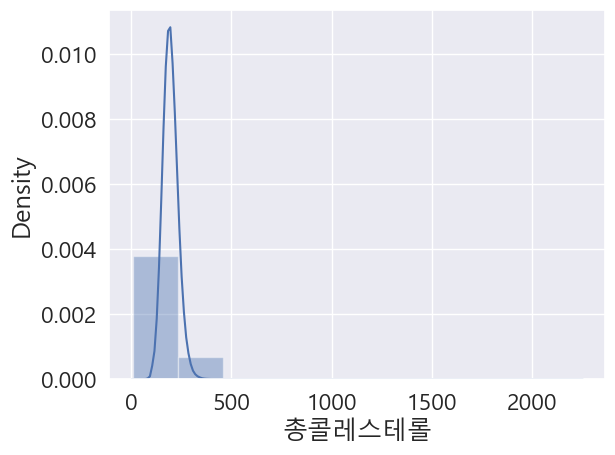

In [118]:
 sns.distplot(df_chol, bins=10)
# bin으로 데이터를 몇 개로 나눠 담을 것인지를 설정할 수 있음
## 이상치 때문에 그래프가 한 쪽으로 몰려있는 것을 볼 수 있습니다. max 값이 지나치게 큽니다.

In [119]:
df[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1)]
## 음주를 하는 사람들의 총콜레스테롤 데이터

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
3       2017        4     2           12    11      155.0        55.0   67.5   
5       2017        6     1            8    11      170.0        70.0   84.8   
6       2017        7     1            8    48      175.0       110.0  111.5   
9       2017       10     1            8    11      170.0        70.0   86.0   
18      2017       19     1            8    30      175.0        80.0   88.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
999992  2017   999993     2            5    30      160.0        50.0   68.1   
999993  2017   999994     1            8    47      175.0        95.0   88.0   
999994  2017   999995     1           10    41      165.0        85.0   98.0   
999995  2017   999996     2            9    41      165.0        55.0   70.0   
999998  2017   999999     1           11    47      160.0        70.0   99.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
3         0.9    1.0  ...   30.0   1.0   1.0          0      NaN    NaN   
5         1.2    1.0  ...   33.0   2.0   1.0          1      NaN    NaN   
6         1.0    1.0  ...   45.0   3.0   1.0          0      NaN    NaN   
9         1.0    1.0  ...   88.0   1.0   1.0          1      NaN    NaN   
18        0.8    0.8  ...   18.0   2.0   1.0          1      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
999992    1.0    1.0  ...   15.0   3.0   1.0          1      NaN    NaN   
999993    1.2    1.5  ...   93.0   3.0   1.0          0      NaN    NaN   
999994    0.7    0.9  ...   66.0   3.0   1.0          0      NaN    NaN   
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
3           NaN           NaN  NaN  20181126  
5           NaN           NaN  1.0  20181126  
6           NaN           NaN  NaN  20181126  
9           NaN           NaN  0.0  20181126  
18          NaN           NaN  0.0  20181126  
...         ...           ...  ...       ...  
999992      NaN           NaN  1.0  20181126  
999993      NaN           NaN  NaN  20181126  
999994      NaN           NaN  NaN  20181126  
999995      NaN           NaN  NaN  20181126  
999998      NaN           NaN  NaN  20181126  

[496733 rows x 34 columns]

C:\Users\user\AppData\Local\Temp\ipykernel_31088\3017562566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"])


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

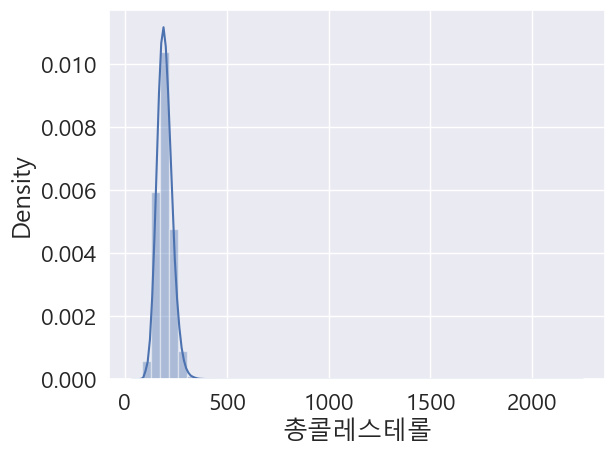

In [120]:
sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"])

C:\Users\user\AppData\Local\Temp\ipykernel_31088\1295728855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 0), "총콜레스테롤"])


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

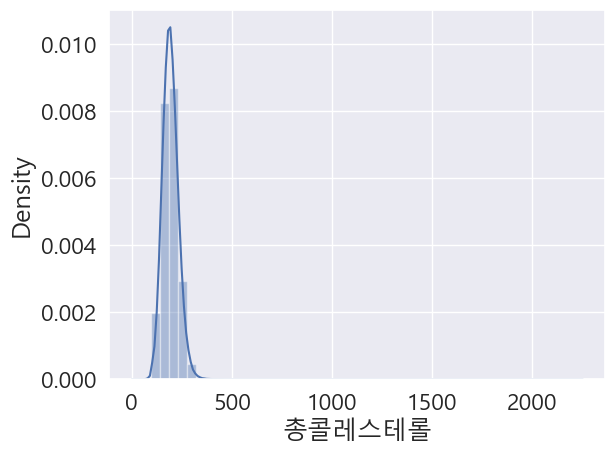

In [121]:
sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 0), "총콜레스테롤"])

C:\Users\user\AppData\Local\Temp\ipykernel_31088\1095617625.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"], hist=False)
C:\Users\user\AppData\Local\Temp\ipykernel_31088\1095617625.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

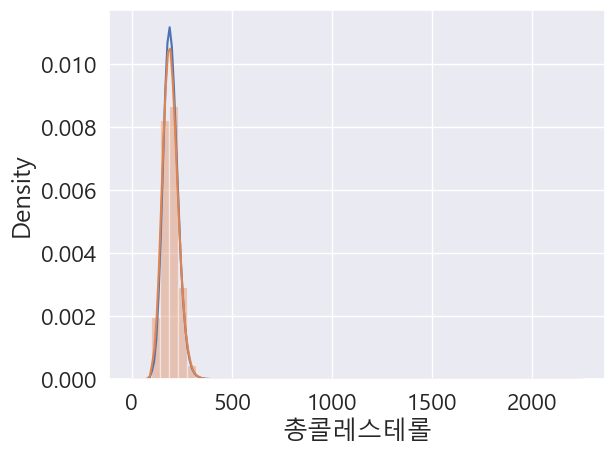

In [122]:
sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"], hist=False)
sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 0), "총콜레스테롤"])
# hist=False로 설정해주면 선만 나옵니다.

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

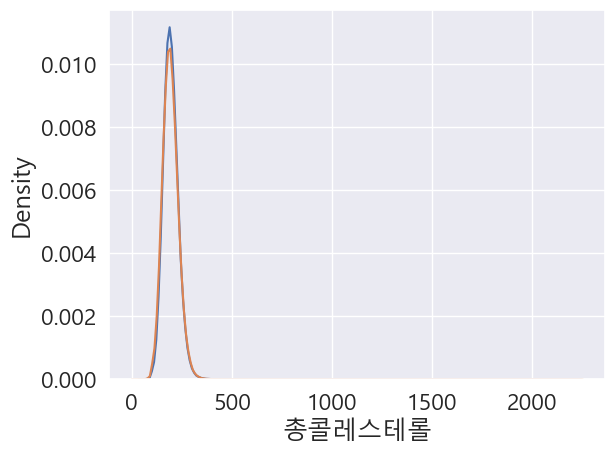

In [123]:
sns.kdeplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")
# 확률밀도함수만 그리기 위해서 kdeplot을 그립니다.
# label을 넣어서 각 데이터를 설명해줍니다.

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

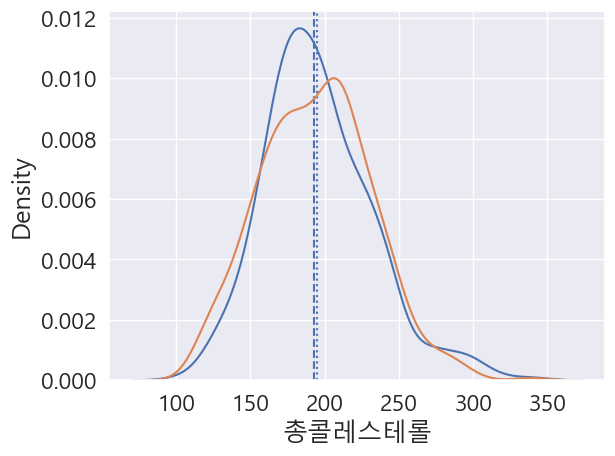

In [125]:
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc[(df_sample["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc[(df_sample["총콜레스테롤"].notnull()) & (df["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")
# plt.axvline()을 사용하여 그래프에 평균값과 중앙값 선을 그릴 수 있습니다.

C:\Users\user\AppData\Local\Temp\ipykernel_31088\3030321966.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_1, label="음주 중")
C:\Users\user\AppData\Local\Temp\ipykernel_31088\3030321966.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_0, label="음주 중")


<Axes: xlabel='감마지티피', ylabel='Density'>

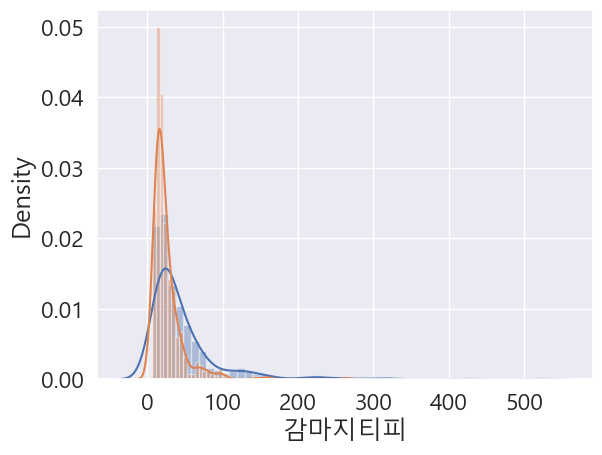

In [127]:
s_1 = df_sample[df_sample["음주여부"] == 1]["감마지티피"]
s_0 = df_sample[df_sample["음주여부"] == 0]["감마지티피"]

sns.distplot(s_1, label="음주 중")
sns.distplot(s_0, label="음주 중")
# 음주 여부에 따른 "감마지티피"를 확인합니다.
## 음주 안하는 사람들의 감마지티피값이 더 뾰족하다는 것을 알 수 있습니다.

## 16. 상관 분석 

### 16.1 상관계수 구하기
- 상관계수는 변수들 간의 관계를 알아볼 때 유용한 개념 
- 특정 데이터에 대한 상관관계를 볼 수 있습니다. 
- 상관계수는 -1부터 1사이로 구성되고, 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있습니다.
- 0에 가까우면 상관관계가 없다고 볼 수 있습니다.
 

In [129]:
columns = ['연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부']
columns

['연령대코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [130]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr


연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.397412   -0.210610  0.134720 -0.201947 -0.203802   
신장(5Cm단위)      -0.397412   1.000000    0.648489  0.293774  0.141800  0.156605   
체중(5Kg 단위)     -0.210610   0.648489    1.000000  0.790520  0.076534  0.133502   
허리둘레            0.134720   0.293774    0.790520  1.000000 -0.033007  0.034518   
시력(좌)          -0.201947   0.141800    0.076534 -0.033007  1.000000  0.462877   
시력(우)          -0.203802   0.156605    0.133502  0.034518  0.462877  1.000000   
청력(좌)           0.193769  -0.100178   -0.038100  0.048379 -0.049368 -0.041439   
청력(우)           0.253585  -0.121083   -0.070590  0.052245 -0.084603 -0.096255   
수축기혈압           0.296807   0.030012    0.244673  0.333025 -0.010112 -0.020638   
이완기혈압           0.149758   0.118103    0.287084  0.302398 -0.001695  0.012802   
식전혈당(공복혈당)      0.166079   0.059881    0.155556  0.219585 -0.075272  0.006790   
총콜레스테롤          0.005873  -0.013813    0.082305  0.081332  0.005267  0.038706   
트리글리세라이드        0.033434   0.113687    0.238945  0.288572  0.029648  0.018477   
HDL콜레스테롤       -0.121635  -0.152505   -0.357603 -0.409940  0.021295 -0.030666   
LDL콜레스테롤        0.023206  -0.003485    0.106049  0.098301 -0.015221  0.044949   
혈색소            -0.165788   0.529475    0.508366  0.377023  0.073866  0.056753   
요단백            -0.022885   0.014089    0.028840 -0.002252  0.010995  0.009548   
혈청크레아티닌         0.020587   0.243101    0.190769  0.149351  0.018104  0.031835   
(혈청지오티)AST      0.106376   0.035321    0.196722  0.229202  0.003379  0.024706   
(혈청지오티)ALT     -0.014101   0.187945    0.372930  0.357288  0.029429  0.083163   
감마지티피           0.052946   0.171372    0.254150  0.271566  0.011519  0.045560   
흡연상태           -0.136350   0.505945    0.397230  0.268685  0.063964  0.054681   
음주여부           -0.277149   0.362905    0.235974  0.084514  0.073696  0.063220   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.193769  0.253585  0.296807  0.149758  ... -0.121635  0.023206   
신장(5Cm단위)   -0.100178 -0.121083  0.030012  0.118103  ... -0.152505 -0.003485   
체중(5Kg 단위)  -0.038100 -0.070590  0.244673  0.287084  ... -0.357603  0.106049   
허리둘레         0.048379  0.052245  0.333025  0.302398  ... -0.409940  0.098301   
시력(좌)       -0.049368 -0.084603 -0.010112 -0.001695  ...  0.021295 -0.015221   
시력(우)       -0.041439 -0.096255 -0.020638  0.012802  ... -0.030666  0.044949   
청력(좌)        1.000000  0.512849  0.105602  0.034535  ... -0.015340 -0.018551   
청력(우)        0.512849  1.000000  0.127883  0.041907  ... -0.078820 -0.059298   
수축기혈압        0.105602  0.127883  1.000000  0.744132  ... -0.138843  0.003982   
이완기혈압        0.034535  0.041907  0.744132  1.000000  ... -0.090783  0.045014   
식전혈당(공복혈당)  -0.000567  0.035457  0.168399  0.134820  ... -0.136568 -0.038186   
총콜레스테롤      -0.034960 -0.095937  0.047920  0.097394  ...  0.137891  0.880425   
트리글리세라이드    -0.029229 -0.027957  0.187875  0.166679  ... -0.383788  0.011516   
HDL콜레스테롤    -0.015340 -0.078820 -0.138843 -0.090783  ...  1.000000 -0.062431   
LDL콜레스테롤    -0.018551 -0.059298  0.003982  0.045014  ... -0.062431  1.000000   
혈색소         -0.015990 -0.031084  0.143038  0.219912  ... -0.208488  0.112034   
요단백         -0.026771 -0.013656  0.016896  0.021567  ... -0.005009 -0.004715   
혈청크레아티닌     -0.026352 -0.030057  0.090268  0.131162  ... -0.142140  0.037578   
(혈청지오티)AST   0.014587  0.002233  0.143089  0.159043  ... -0.031833  0.011017   
(혈청지오티)ALT   0.003031 -0.023672  0.118240  0.154490  ... -0.179211  0.075795   
감마지티피       -0.006351  0.005842  0.176208  0.204673  ... -0.121648  0.046815   
흡연상태        -0.034204 -0.040937  0.108511  0.144251  ... -0.188906 -0.011593   
음주여부        -0.037669 -0.032475  0.032543  0.110143  ...  0.052452 -0.046947   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.165788 -0.022885  0.020587    0.106376   -0.014101  0

In [134]:
df_corr["신장(5Cm단위)"].sort_values()

연령대코드(5세단위)   -0.397412
HDL콜레스테롤      -0.152505
청력(우)         -0.121083
청력(좌)         -0.100178
총콜레스테롤        -0.013813
LDL콜레스테롤      -0.003485
요단백            0.014089
수축기혈압          0.030012
(혈청지오티)AST     0.035321
식전혈당(공복혈당)     0.059881
트리글리세라이드       0.113687
이완기혈압          0.118103
시력(좌)          0.141800
시력(우)          0.156605
감마지티피          0.171372
(혈청지오티)ALT     0.187945
혈청크레아티닌        0.243101
허리둘레           0.293774
음주여부           0.362905
흡연상태           0.505945
혈색소            0.529475
체중(5Kg 단위)     0.648489
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [136]:
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]
# 신장과의 상관계수가 0.3 이상인 feature만 가져오기 

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.648489
혈색소           0.529475
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

In [137]:
df_corr.loc[df_corr["음주여부"] > 0.1, "음주여부"]
# 음주여부와의 상관계수가 0.3 이상인 feature만 가져오기

신장(5Cm단위)     0.362905
체중(5Kg 단위)    0.235974
이완기혈압         0.110143
트리글리세라이드      0.103018
혈색소           0.291863
감마지티피         0.250011
흡연상태          0.365642
음주여부          1.000000
Name: 음주여부, dtype: float64

In [138]:
df_corr["음주여부"].sort_values()

연령대코드(5세단위)   -0.277149
LDL콜레스테롤      -0.046947
청력(좌)         -0.037669
청력(우)         -0.032475
요단백           -0.012932
총콜레스테롤         0.019892
수축기혈압          0.032543
HDL콜레스테롤       0.052452
시력(우)          0.063220
혈청크레아티닌        0.072320
시력(좌)          0.073696
허리둘레           0.084514
식전혈당(공복혈당)     0.086991
(혈청지오티)AST     0.088594
(혈청지오티)ALT     0.095971
트리글리세라이드       0.103018
이완기혈압          0.110143
체중(5Kg 단위)     0.235974
감마지티피          0.250011
혈색소            0.291863
신장(5Cm단위)      0.362905
흡연상태           0.365642
음주여부           1.000000
Name: 음주여부, dtype: float64

In [139]:
df_corr.loc[df_corr["음주여부"] > 0.25, "음주여부"]
# 상관계수는 두 변수 간의 연관된 정도만 나타낼 뿐 인과관계를 설명하는 것은 아닙니다.

신장(5Cm단위)    0.362905
혈색소          0.291863
감마지티피        0.250011
흡연상태         0.365642
음주여부         1.000000
Name: 음주여부, dtype: float64

In [141]:
df_corr["혈색소"].sort_values(ascending=False).head(7)
# 혈색소와의 상관 계수를 내림차순으로 정렬합니다.

혈색소           1.000000
신장(5Cm단위)     0.529475
체중(5Kg 단위)    0.508366
흡연상태          0.460010
허리둘레          0.377023
(혈청지오티)ALT    0.294575
음주여부          0.291863
Name: 혈색소, dtype: float64

In [143]:
df_corr["감마지티피"].sort_values(ascending=False).head(7)
# 간수치와 관련된 값들이 상위로 나옵니다.

감마지티피         1.000000
(혈청지오티)AST    0.525509
(혈청지오티)ALT    0.514197
트리글리세라이드      0.335514
흡연상태          0.305811
식전혈당(공복혈당)    0.292087
허리둘레          0.271566
Name: 감마지티피, dtype: float64

### 16.2 heatmap
- 다른 그래프와 달리 heatmap은 바로 data만 넣어줍니다.
- 상관 관계가 클수록 값이 색이 진해집니다.
- annot 옵션으로 숫자를 나타낼 수 있고, fmt으로 소수점 갯수를 지정할 수 있고, cmap으로 색상을 지정할 수 있습니다.

<Axes: >

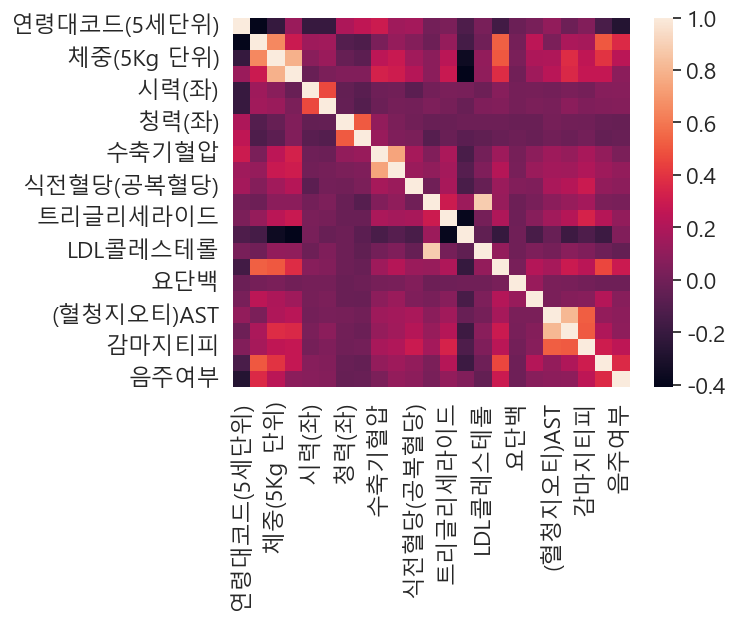

In [147]:
sns.heatmap(df_corr)

<Axes: >

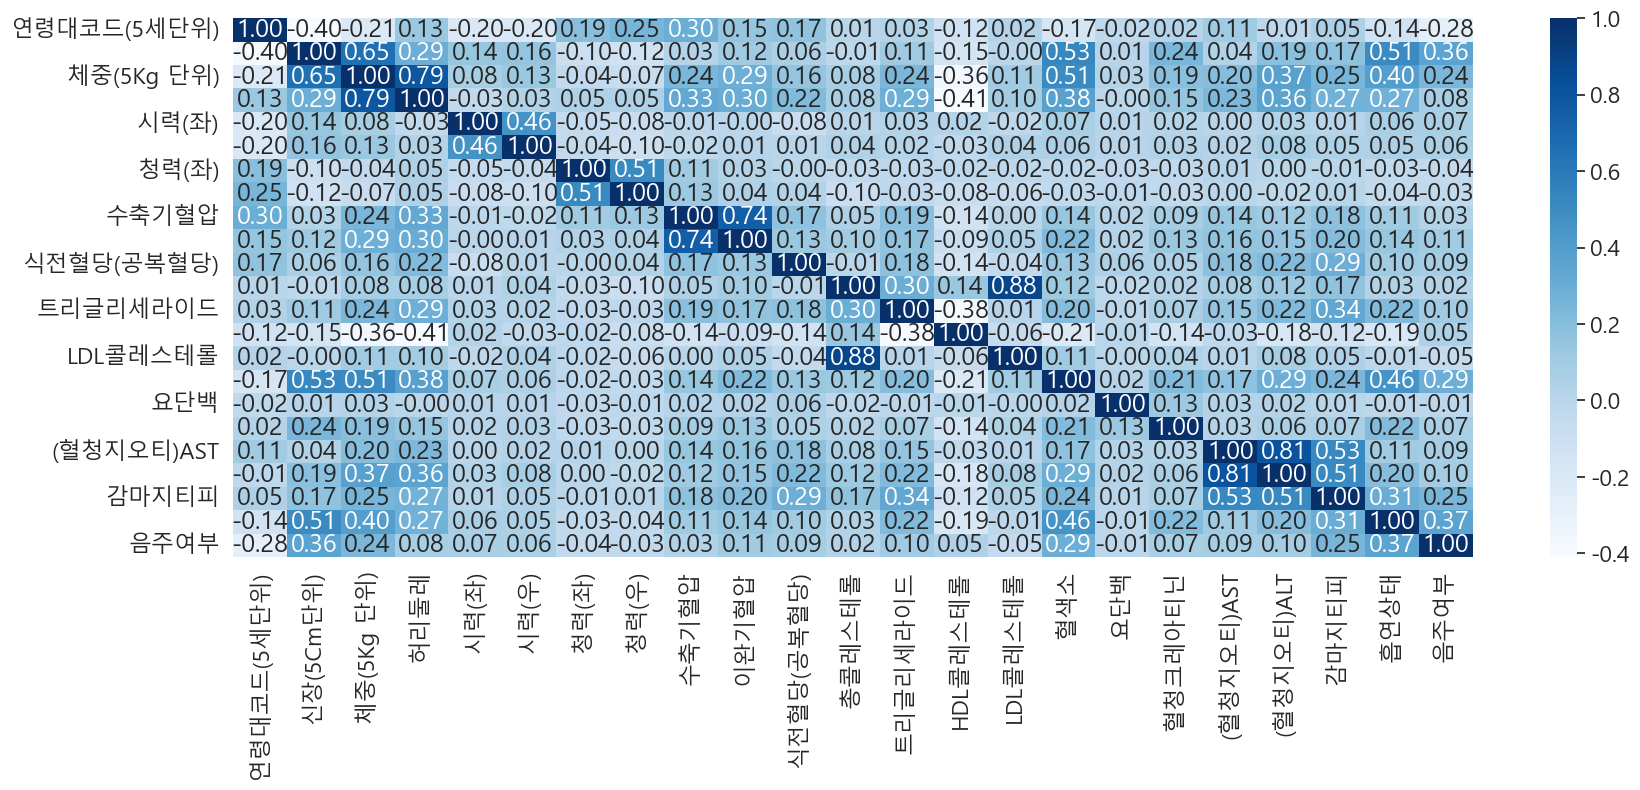

In [145]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")
# 체중과 신장은 허리둘레와 상관관계가 있습니다.

<Axes: >

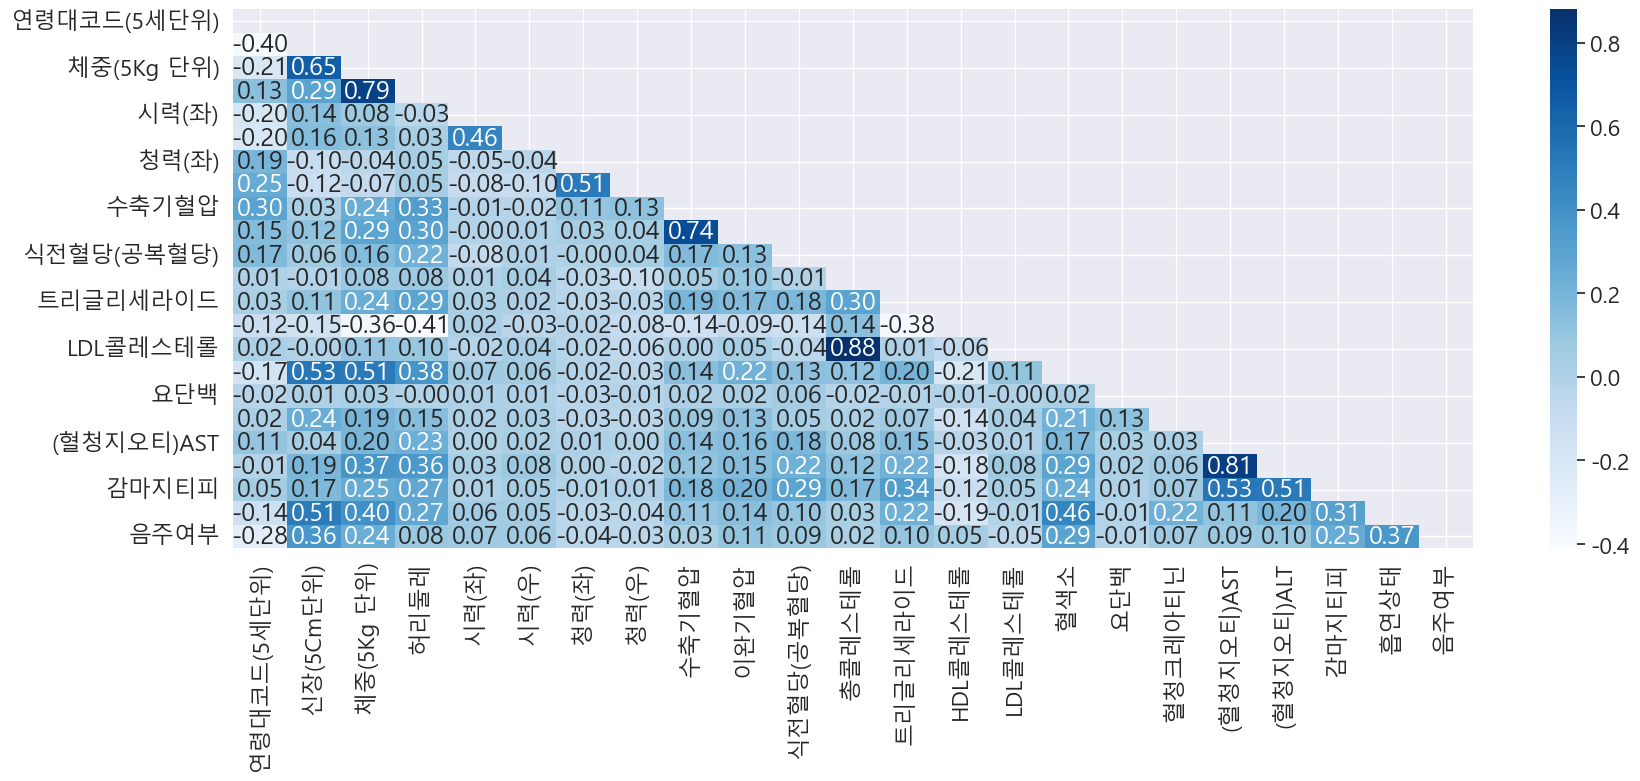

In [152]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)
# 매트릭스의 대각선 아래만 표시하는 mask
# vmax, vmin은 색상 농도를 지정하는 옵션